# Big Mart Sales

<div class="alert alert-block alert-info"><b>Note:</b> I am not a natural english speaker. so you may find some typos and grammar mistakes, I appologize in advance :).</div>

<div class="alert alert-block alert-info"><b>Note: </b> this is a GitHub version which is more in try and error style. Meaning that it contains both successful procedures and those that led nowhere. I am also more eloquent here.</div>

## Introduction 

*The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.*

*Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.*

*lease note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.*

**Columns description:**

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.

**Goal:**

1. Predict sales of the product in the particular store. 

**Agenda:**

- [x] get the data and explore them to get an insight
- [x] clean and prepare your data
- [x] explore many different ml methods and chose the best one (or group of them) 
- [x] fine-tune your model/s 
- [ ] ~~present your solution~~
- [ ] ~~launch, monitor, and maintain your system~~

Final sequence of tasks could be slightly different. Let's dive into ML!

## Data Exploration and visualization

Basic imports, others will be imported as needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import matplotlib.style as style
style.use('ggplot') #just changing seaborn style
import warnings
warnings.filterwarnings('ignore')

### Loading data and first look

In [2]:
mart_exploration = pd.read_csv("train_big_mart.csv")

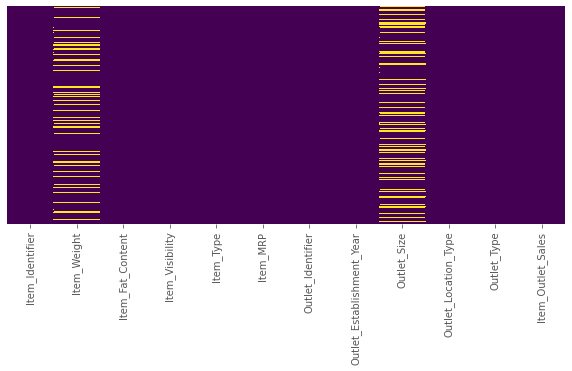

In [3]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10,4))
sns.heatmap(mart_exploration.isnull(),yticklabels=False, cbar=False, cmap='viridis', ax=axs)

Only two columns have missing values and that is Item_Weight and Outlet Size.

In [4]:
mart_exploration.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


I don't see anything obivous from info and describe tables. It would be much better to proceed with deeper looking, column by column.

### Columns step by step

Let's get an better picture about this dataset and determine a strategy for each column.

<div class="alert alert-block alert-warning"><b>Item_Identifier</b></div>

In [5]:
mart_exploration["Item_Identifier"].value_counts() #counting unique values

FDG33    10
FDW13    10
NCJ30     9
NCQ06     9
FDT07     9
         ..
FDK57     1
FDT35     1
FDY43     1
FDN52     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [6]:
mart_exploration["Item_Identifier"].value_counts().value_counts()

5     395
6     383
7     253
4     234
3     113
8     110
2      35
9      25
1       9
10      2
Name: Item_Identifier, dtype: int64

Well this result slightly complicates our analysis. I defenitely can't delete Item_Identifier, quite the contrary I have toapprocah it very carefully.

In [7]:
mart_exploration[(mart_exploration["Item_Identifier"] == "FDW13")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
256,FDW13,8.5,Low Fat,0.098438,Canned,51.1324,OUT017,2007,NaN,Tier 2,Supermarket Type1,259.6620
1141,FDW13,8.5,Low Fat,0.097866,Canned,51.1324,OUT035,2004,Small,Tier 2,Supermarket Type1,1350.2424
2190,FDW13,8.5,Low Fat,0.098283,Canned,51.3324,OUT018,2009,Medium,Tier 3,Supermarket Type2,934.7832
3928,FDW13,NaN,Low Fat,0.097411,Canned,52.7324,OUT027,1985,Medium,Tier 3,Supermarket Type3,2492.7552
3978,FDW13,8.5,Low Fat,0.098037,Canned,51.5324,OUT049,1999,Medium,Tier 1,Supermarket Type1,882.8508
6499,FDW13,8.5,Low Fat,0.098083,Canned,50.3324,OUT045,2002,NaN,Tier 2,Supermarket Type1,675.1212
6587,FDW13,8.5,low fat,0.163839,Canned,51.3324,OUT010,1998,NaN,Tier 3,Grocery Store,311.5944
7029,FDW13,8.5,Low Fat,0.097803,Canned,50.5324,OUT013,1987,High,Tier 3,Supermarket Type1,882.8508
8025,FDW13,NaN,Low Fat,0.171384,Canned,50.5324,OUT019,1985,Small,Tier 1,Grocery Store,207.7296
8032,FDW13,8.5,Low Fat,0.097885,Canned,52.5324,OUT046,1997,Small,Tier 1,Supermarket Type1,1194.4452


**Observations:**

- *Item_weight can be calculated based on same Item_Identifier.*
- *I cann't merge products with same ID, they are from different places, stores etc..therefore I am forced to categorize them.*

<div class="alert alert-block alert-warning"><b>Item_Weight</b></div>

In [8]:
weight_nan = mart_exploration[["Outlet_Identifier","Item_Weight"]].groupby("Outlet_Identifier").count()

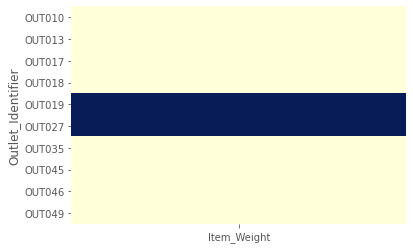

In [9]:
sns.heatmap(weight_nan == 0,yticklabels=True, cbar=False, cmap='YlGnBu')

In [10]:
weight_nan

,Item_Weight
Outlet_Identifier,
OUT010,555
OUT013,932
OUT017,926
OUT018,928
OUT019,0
OUT027,0
OUT035,930
OUT045,929
OUT046,930


Item weight values is missing only for two stores, I will use data from other stores to fill in weight for products. If the product won't be found in any of the other stores, weights will be filled in according to the median.

<div class="alert alert-block alert-warning"><b>Item_Fat_Content</b></div>

In [11]:
mart_exploration["Item_Fat_Content"][(mart_exploration["Item_Fat_Content"]==  "LF")] = "Low Fat"
mart_exploration["Item_Fat_Content"][(mart_exploration["Item_Fat_Content"]==  "low fat")] = "Low Fat"
mart_exploration["Item_Fat_Content"][(mart_exploration["Item_Fat_Content"]==  "reg")] = "Regular"

In [12]:
mart_exploration.groupby("Item_Fat_Content").mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
Low Fat,12.937387,0.064330,140.714098,1997.812398,2157.711534
Regular,12.711654,0.069439,141.504259,1997.867598,2224.561170


There is not much connection between Fat Content and Sales. I can just use nominal encoding for this column.

**Observations:**

- *Dataset has more entries for Low Fat and Regular, need to be changed before encoding.*
- *There is no significant difference between Regular and Low Fat in sales, MRP or Visibility.*
- *Nominal encoding will be sufficient.*

<div class="alert alert-block alert-warning"><b>Item_Visibility</b></div>

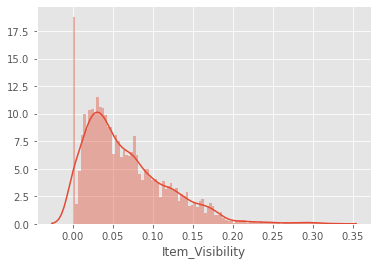

In [13]:
sns.distplot(mart_exploration["Item_Visibility"], bins = 100)

I have got some very visible products, but I have no problem with that unlike with products which have visibility 0. I guess they're not lying in storage somwhere...

In [14]:
mart_exploration[["Item_Visibility", "Outlet_Identifier"]].groupby("Outlet_Identifier").sum()

,Item_Visibility
Outlet_Identifier,
OUT010,56.308832
OUT013,55.879859
OUT017,56.834646
OUT018,56.621454
OUT019,57.257041
OUT027,54.804764
OUT035,56.974873
OUT045,56.180780
OUT046,56.231875


The sum of % of all products in each store is about 56. It probably doesn't matter, I will have to normalize values anyway.

**Observations:**

- *Visibility is missing for more than 500 products.*
- *Fill zero values with ML algorithm or with mean values.*
- *Or based on same product type - match between product and store type -> probably same visibility.*

<div class="alert alert-block alert-warning"><b>Item_Type</b></div>

<div class="alert alert-block alert-info"><b>Note3:</b> Outlet type appears across multiple columns</div>

In [15]:
mart = mart_exploration[["Item_Outlet_Sales","Item_Type","Item_Visibility","Outlet_Type"]]\
.groupby(["Item_Type","Outlet_Type"]).mean().reset_index()

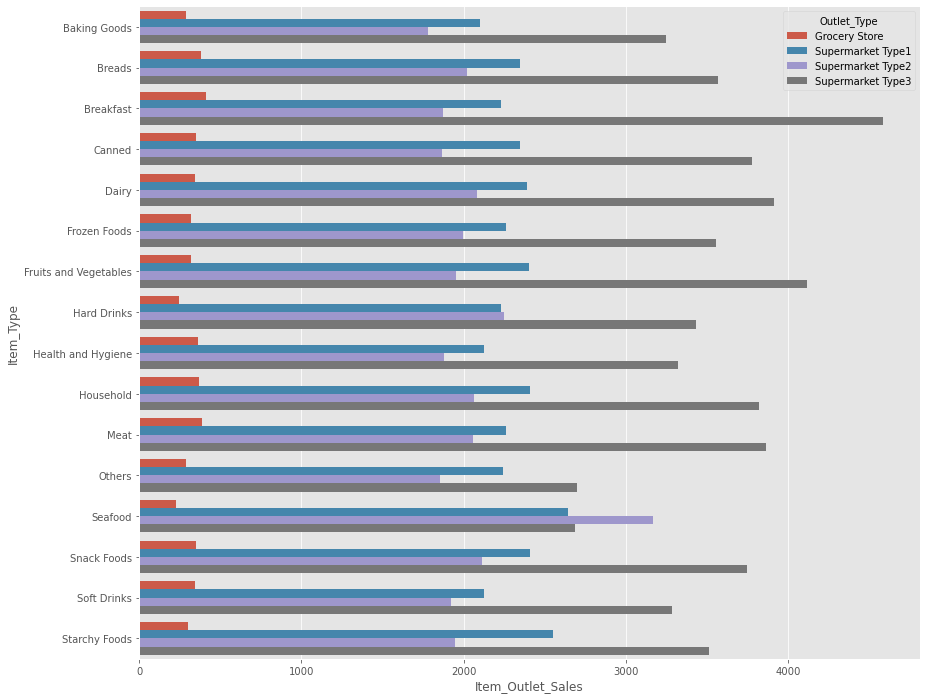

In [16]:
plt.figure(figsize=(14,12))
sns.barplot(x="Item_Outlet_Sales",y = "Item_Type", hue="Outlet_Type", data=mart)

Item_Type is ok, there are no anomalies atleast with Sales, no missing values. We can notice clear patterns. Supermarket Type3 has highest sales in all categories except seafood, vice vera Grocery stores has lowest. I can probably try merg some categories, a lot of them are very similar in term of price.

**Observations:**

- *nominal encoding*
- *try to lower number of categories*

<div class="alert alert-block alert-warning"><b>Item_MRP</b></div>

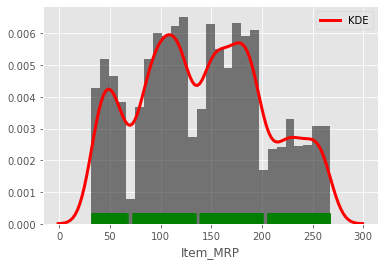

In [17]:
sns.distplot(mart_exploration["Item_MRP"], 
             rug=True, rug_kws={"color": "g", "alpha": 0.5},
            kde_kws={"color": "r", "lw": 3, "label": "KDE"},
            hist_kws={"alpha": 0.5, "color": "k"})

MRP has quite standard distribution, it has no outliers that should be deleted. Let's look at MRP from another angle. It is possible to notice value outages at MRP 70, 130 and 200.

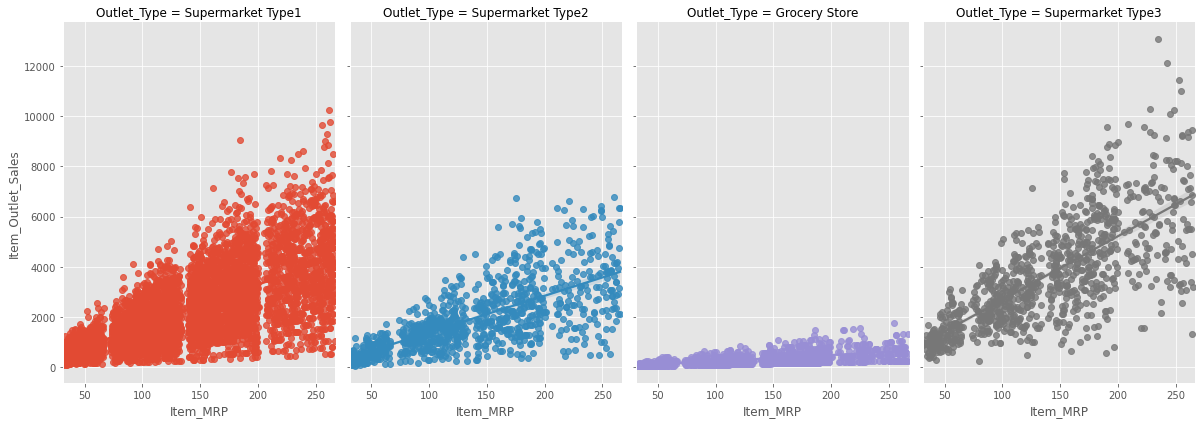

In [18]:
import matplotlib.style as style
style.use('ggplot') #just changing seaborn style

sns.lmplot(x="Item_MRP",y="Item_Outlet_Sales", hue = "Outlet_Type", col= "Outlet_Type", \
           data=mart_exploration, height=6, aspect=.7)


So we can see that every type of supermarket has different distribution. Let's look at some other plots if we can spot some pattern.

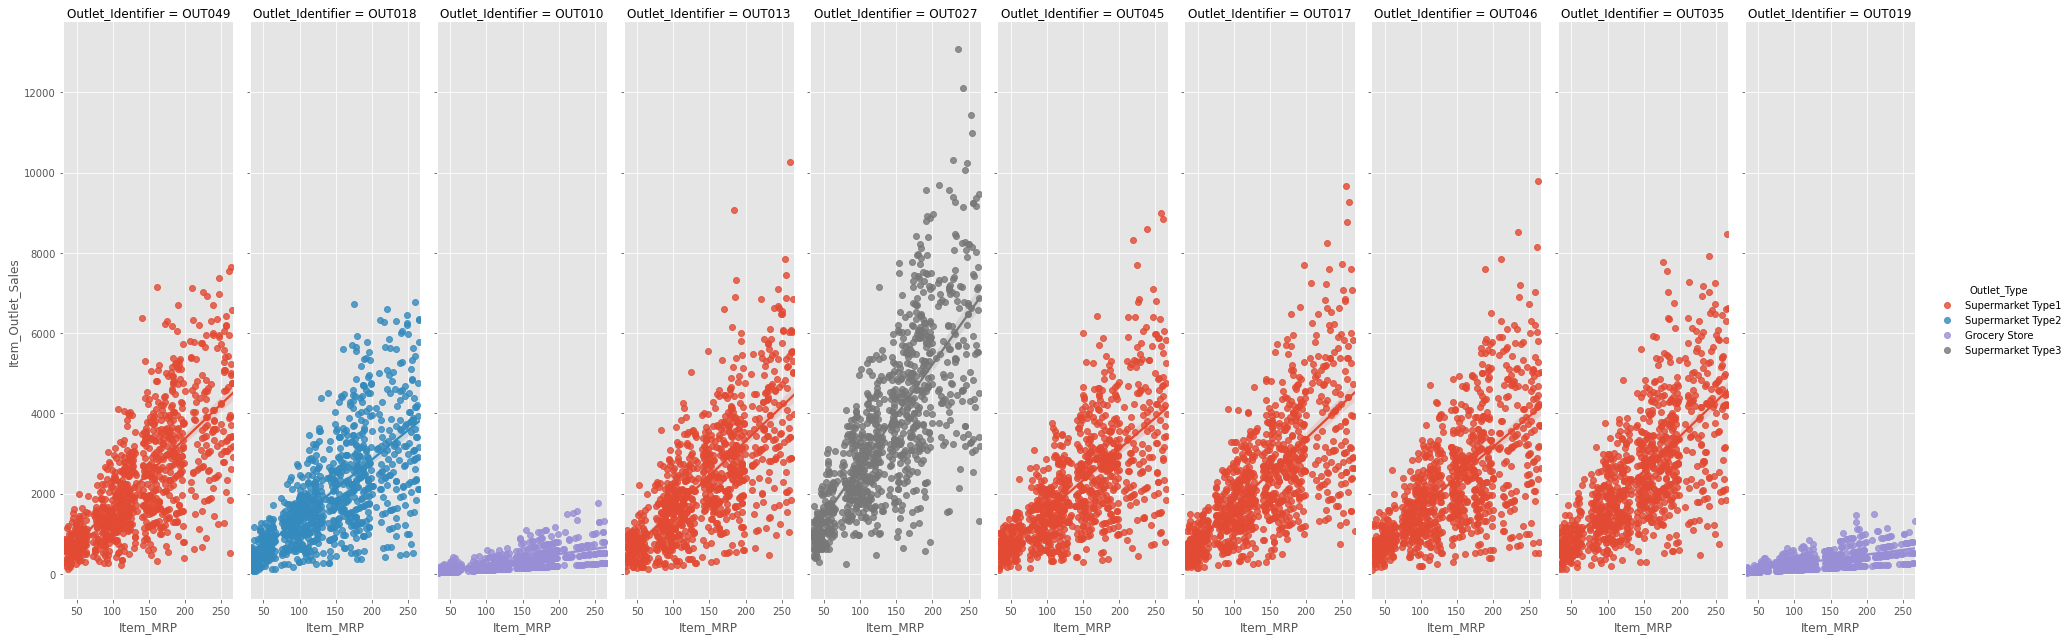

In [19]:
sns.lmplot(x="Item_MRP",y="Item_Outlet_Sales", hue = "Outlet_Type", col= "Outlet_Identifier", \
           data=mart_exploration, height=9, aspect=.3)

I would like to delete weird gaps between MRP. As i can see every type of stores has a didferent distribution of products. Type of product doesn't have a big impact on this. I probably could create new group of supermarkets from Supermarket Type1 but I don't think that it would bring some benefits and that's why I'll leave it as it is for now.

**Observations:**

- *standardscaler or normalizers*
- *maybe trying to delete some outliers*
- *try to delet gaps in MRP to make data more consistent*

<div class="alert alert-block alert-warning"><b>Outlet_Identifier</b></div>

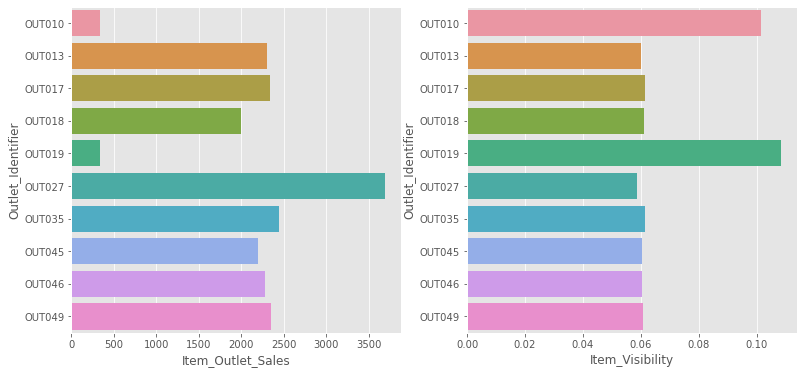

In [20]:
outlet = mart_exploration.groupby("Outlet_Identifier").mean().reset_index() #grouping values based on outlet_identifier
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(13,6))
sns.barplot(x="Item_Outlet_Sales",y = "Outlet_Identifier", data=outlet, ax=axs[0])
sns.barplot(x="Item_Visibility",y = "Outlet_Identifier", data=outlet, ax= axs[1])

Outlet 10 and 19 are Grocery stores, each product has higher visibility, this is due to the smaller number of products in the store. OUT27 is Supermarket Type 3, and it's only one in its category, same for OUT18 which could be in same category as OUT45. Let's check sortiment of each outlet, if there is some link which could lead to a redistribution of outlet types. From this point of view I cannot see a clear answer.

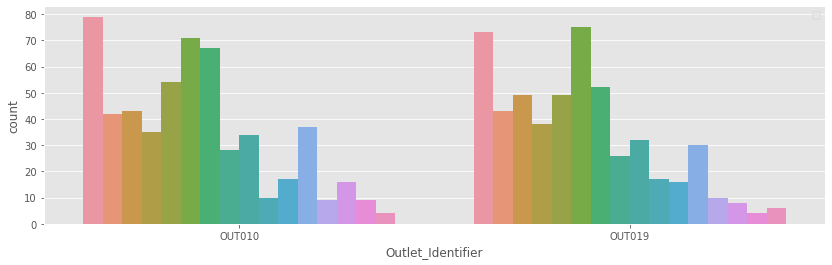

In [21]:
plt.figure(figsize=(14,4))
sns.countplot(x="Outlet_Identifier", hue="Item_Type", \
              data=mart_exploration[(mart_exploration["Outlet_Type"] == "Grocery Store")])

plt.legend('')

Grocery stores as expected are very similar to each other in terms of product sortiment. There is nothing to solve here.

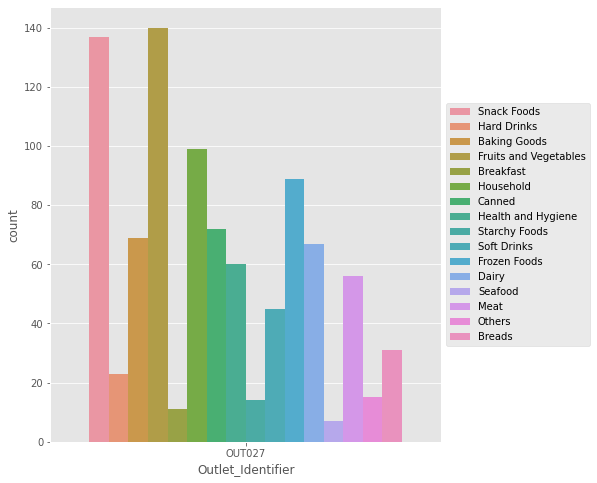

In [22]:
plt.figure(figsize=(7,8))
sns.countplot(x="Outlet_Identifier", hue="Item_Type", \
              data=mart_exploration[(mart_exploration["Outlet_Type"] == "Supermarket Type3")])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Now we can see very different story, our distribution of product sortiment differ singificcantly from Grocery stores. It's our outlet with its own category so no big deal.

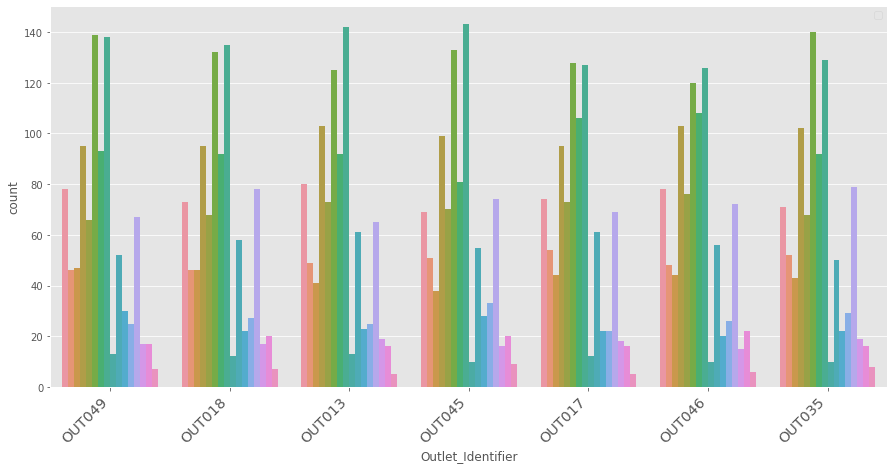

In [23]:
data = mart_exploration[(mart_exploration["Outlet_Type"] == "Supermarket Type1") |\
                 (mart_exploration["Outlet_Type"] == "Supermarket Type2")]

plt.figure(figsize=(15,7))
g = sns.countplot(x="Outlet_Identifier", hue="Item_Type", data=data) 
                                   
                                                                  
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
)
plt.legend('')

They all look very similar. I would like to move OUT18 to same category as other. Grocery stores and Type3 has different distributions of product sales for each sortiment, but not Type2. Some other factor affects the sales  for Type 2.

Only Grocery stores has a lower number of products, now the sortiment.

**Observations:**

- *nominal encoding or maby even ordinal where Grocery worst, type 3 best*
- *visibility as a value only matters at the level of outlet*
- *change OUT18 as Type1*

<div class="alert alert-block alert-warning"><b>Outlet_Establishment_Year</b></div>

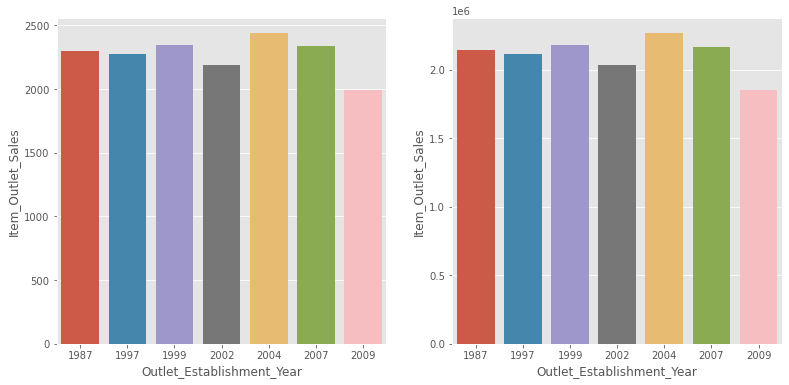

In [24]:
data_year = mart_exploration[(mart_exploration["Outlet_Type"] == "Supermarket Type1") |\
                 (mart_exploration["Outlet_Type"] == "Supermarket Type2")].\
groupby("Outlet_Establishment_Year") #grouping my data only for type1 and type2

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(13,6)) #creating fig for charts

sns.barplot(x="Outlet_Establishment_Year",y = "Item_Outlet_Sales",data=data_year.mean().reset_index(), ax=axs[0])
sns.barplot(x="Outlet_Establishment_Year",y = "Item_Outlet_Sales",data=data_year.sum().reset_index(), ax=axs[1])

My Type2 is very similar to Type1 but maybe it's just newer and not so familiar to customers. I will definitely wan't to delete this column or just change it to something like, new x old.

**Observations:**

- *drop this column*
- *or some kind of categorical encoding, definitely not a numeric one*
- *new and old*

<div class="alert alert-block alert-warning"><b>Outlet_Size</b></div>

In [25]:
mart_exploration.groupby(["Outlet_Size","Outlet_Type","Outlet_Identifier"]).sum()

Item_Weight  Item_Visibility  \
Outlet_Size Outlet_Type       Outlet_Identifier                                 
High        Supermarket Type1 OUT013               12121.730        55.879859   
Medium      Supermarket Type1 OUT049               12013.225        56.549156   
            Supermarket Type2 OUT018               11946.465        56.621454   
            Supermarket Type3 OUT027                   0.000        54.804764   
Small       Grocery Store     OUT019                   0.000        57.257041   
            Supermarket Type1 OUT035               11931.295        56.974873   
                              OUT046               11966.125        56.231875   

                                                    Item_MRP  \
Outlet_Size Outlet_Type       Outlet_Identifier                
High        Supermarket Type1 OUT013             131809.0156   
Medium      Supermarket Type1 OUT049             130476.8598   
            Supermarket Type2 OUT018             131477.7724   
            Supermarket Type3 OUT027             130714.6746   
Small       Grocery Store     OUT019              73807.5824   
            Supermarket Type1 OUT035             133103.9070   
                              OUT046             132113.3698   

                                                 Outlet_Establishment_Year  \
Outlet_Size Outlet_Type       Outlet_Identifier                              
High        Supermarket Type1 OUT013                               1851884   
Medium      Supermarket Type1 OUT049                               1859070   
            Supermarket Type2 OUT018                               1864352   
            Supermarket Type3 OUT027                               1855975   
Small       Grocery Store     OUT019                               1048080   
            Supermarket Type1 OUT035                               1863720   
                              OUT046                               1857210   

                                                 Item_Outlet_Sales  
Outlet_Size Outlet_Type       Outlet_Identifier                     
High        Supermarket Type1 OUT013                  2.142664e+06  
Medium      Supermarket Type1 OUT049                  2.183970e+06  
            Supermarket Type2 OUT018                  1.851823e+06  
            Supermarket Type3 OUT027                  3.453926e+06  
Small       Grocery Store     OUT019                  1.796941e+05  
            Supermarket Type1 OUT035                  2.268123e+06  
                              OUT046                  2.118395e+06

There is no clear link to size of a store and sales or MRP. I want to create only Big / Small size, for Grocery and Non Grocery, and also assign based on similarity of assortment sales. From second chart above is clearly visible that OUT010 is small, OUT017 is medium and OUT045 is high.

**Observations:**

- *Grocery stores are small and others are big, nothing else*
- *OUT010 is small, OUT017 is medium and OUT045*
- *Both versions are nominal encoding*

<div class="alert alert-block alert-warning"><b>Outlet_Location_Type</b></div>

In [26]:
mart_exploration[["Outlet_Location_Type","Item_Outlet_Sales","Outlet_Type"]].\
groupby(["Outlet_Location_Type","Outlet_Type"]).mean()

Item_Outlet_Sales
Outlet_Location_Type Outlet_Type                         
Tier 1               Grocery Store             340.329723
                     Supermarket Type1        2313.099451
Tier 2               Supermarket Type1        2323.990559
Tier 3               Grocery Store             339.351662
                     Supermarket Type1        2298.995256
                     Supermarket Type2        1995.498739
                     Supermarket Type3        3694.038558

It is possible that there is a certain connection between specific products and their larger sales in other parts of the city. It is therefore advisable to add an option to encode as nominal but also to delete whole column and observe the differences.

**Observations:**

- *nominal encoding and possibility to delete whole column*

<div class="alert alert-block alert-success"><b>Summarizing</b></div>

Visual analysis is complete, here is a list of necessary data operations:

- Item weight has to be filled in based on item identifier | **DataChanger**
- Repair typos in Fat content column | **DataChanger**
- Product visibility has to be replaced (this one will be tough) | **DataChanger**
- Try to delete gaps in MRP, and add an optional possibility to delete all outliers where MRP is above upper limit | **OptionalChanger**
- OUTO18 change to Type1 | **OptionalChanger**
- BIG/SMALL stores or assign value based on distirbution similarity
- Add possibility to drop year column or change it to new and old | **OptionalChanger**
- Tier and Size possibility to delete whole columns | **OptionalChanger**
- Manual scaling of visibility to 100% for each store | **OptionalChanger**

Again i want to have my transformer a little bit flexible. I cann't say for sure what I need or don't need, so I wanna have some possibilities. If my model won't be performing good, there won't be nothing left but to go back to the beginning.

## Custom transformers and data preparation

*Rough scheme*

> 1) Split, Pipelines, Modeling, Tuning
>> 2) easy Nan values, more complicated ones
>>> 3) Encoding for nominal and ordinal variables
>>>> 4) Adding new columns, dropping ones
>>>>> 5) Credit_history solution - multiple versions

In [121]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.metrics import precision_score, recall_score, \
confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from random import randint
import random
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as encoders
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from scipy.sparse import coo_matrix
import lightgbm
from lightgbm import LGBMRegressor

### DataChanger

I will crate two custom transformers as usual, one for filling missing values and for data repair -> actions that would have been taken anyway. Second transformer will be for optional data changes -> for tuning.

<div class="alert alert-block alert-success"><b>DataChanger: </b>code</div>

In [28]:
class DataChanger(BaseEstimator, TransformerMixin):
    """Replacing nan values for loan prediction data set"""
    
    def __init__(self):
        pass
        
      
    def fit(self, data, y=None):
        """mandatory method for transformer"""        
        return self
    

    """_______________________________| METHOD FOR WEIGHTS NAN VALUES |________________________________"""
    
    
    def weights_nan(self, data):
        """fillna weight values - lf same products and fill weight based on that"""
        if "Item_Weight" in data.columns: #if column was not deleted
            
            weights_and_id = {}
            
            mart_for_weights = data.dropna(subset=["Item_Weight"]) #droping nan values
            
            for identifier, weight in zip(mart_for_weights["Item_Identifier"],mart_for_weights["Item_Weight"]):
                weights_and_id[identifier] = weight
            #paraller iterating through columns and creating a dictionary with id a weights
            
            data.set_index("Item_Identifier", inplace=True) #seting index for identifier

            data["Item_Weight"].update(pd.Series(weights_and_id)) 
            #updating nan values from dictionary
            data.reset_index(inplace=True) #reseting index back to numeric values
            
            #Replace the rest of values
            data["Item_Weight"].fillna(data['Item_Weight'].median(), inplace=True)
            
            
    
    """_________________________| METHOD FOR REPAIRING FAT_CONTENT TYPOS |____________________________"""
            
    def fat_content(self, data):
        """just replacing typos in fat content category and rename values"""
        if "Item_Fat_Content" in data.columns: #if column isn't deleted
            data["Item_Fat_Content"][(data["Item_Fat_Content"]==  "LF")] = "Low Fat"
            data["Item_Fat_Content"][(data["Item_Fat_Content"]==  "low fat")] = "Low Fat"
            data["Item_Fat_Content"][(data["Item_Fat_Content"]==  "reg")] = "Regular"
            #just replacing typos nothing else 
        
        
    def outlet_size_nan(self, data):
        if "Outlet_Size" in data.columns:
            data["Outlet_Size"][(data["Outlet_Identifier"] =="OUT010")] = "Small"
            data["Outlet_Size"][(data["Outlet_Identifier"] =="OUT017")] = "Medium"
            data["Outlet_Size"][(data["Outlet_Identifier"] =="OUT045")] = "High"
        #Its not generic at all - only works for this column..
        
    
    
    """____________________________| METHOD FOR REPAIRING VISIBILITY (0) |_______________________________"""
    
    def visibility(self, data):
        """fill visbility value based on same product but in different stores -> only for 
        grocery type I has to use coefficient +/- *1,7 because of lower number of products"""
        if "Item_Visibility" in data.columns: #if column isn't deleted
            
            """CREATING NECESSARY LISTS/SERIES - data to filled in"""
            
            #i am creating series from visiblity products and their means for all type of
            #outlet except grocery stores
            visibility_normal = data[(data["Item_Visibility"] != 0) & \
                                        (data["Outlet_Type"] != "Grocery Store")]\
            .groupby("Item_Identifier").mean()["Item_Visibility"]
            #i wanna non zero values - no mean bias
            
            #same thing but only for grocery stores - they have smaller number of products
            #and therefore different visibility
            visibility_grocery = data[(data["Item_Visibility"] != 0) &\
                                         (data["Outlet_Type"] == "Grocery Store")]\
            .groupby("Item_Identifier").mean()["Item_Visibility"]
            
            #I calculate second series for grocery because in visibility grocery is a lot of them 
            #missing - so I am using simple ratio * product visibility in regular outlet
            visibility_normal_grocery= visibility_normal*(visibility_grocery.mean()/visibility_normal.mean())
            #ration is something about 1,7 but i calculcate more precisely this way
            
            
            """FILLED IN DATA ABOVE AND GET RID OF ZERO VALUES IN VISIBILITY COLUMN"""
            
            #firstly i overwrite zero values with nan but only for NON grocery stores
            data["Item_Visibility"][(data["Item_Visibility"] == 0) & \
                                       (data["Outlet_Type"] != "Grocery Store")] = np.nan
                
            data.set_index("Item_Identifier", inplace = True) # i need to set index so it matches
            #with my pd.series
            data.update(visibility_normal, overwrite=False) #then i update valueswith visibility normal
            #series - overwrite is False so it is updating only nan values (my zeros in Grocery are left
            #unchanged) - no need to specify column - It is using pd.series name as a column name

            #filling nan but now for grocery stores
            data["Item_Visibility"][(data["Item_Visibility"] == 0) & \
                                       (data["Outlet_Type"] == "Grocery Store")] = np.nan
            data.update(visibility_grocery, overwrite=False) #replacing nan values
            data.update(visibility_normal_grocery, overwrite=False) #and again but with second
            #version of my data - I am not doing this in first case because it's a larger set no 
            #added value
            data.reset_index(inplace=True)
            
            """FILLED IN LAST REMAINIGN ZEROS WITH MEAN VALUES"""
            #NOTE: there are not any zeros left but this is a good insurance
            if data["Item_Visibility"].isna().any(): #don't proceed if there are no nan values
                #calculate mean for non grocery and grocery stores
                mean_non_grocery = data["Item_Visibility"][(data["Outlet_Type"] != "Grocery Store")].mean()
                mean_grocery =  data["Item_Visibility"][(data["Outlet_Type"] == "Grocery Store")].mean()
            
                #fillna for non grocery
                data.loc[(data["Outlet_Type"] != "Grocery Store"), "Item_Visibility"] = \
                data.loc[(data["Outlet_Type"] != "Grocery Store"), "Item_Visibility"].fillna(mean_non_grocery)
                
                #and for grocery
                data.loc[(data["Outlet_Type"] == "Grocery Store"), "Item_Visibility"] = \
                data.loc[(data["Outlet_Type"] == "Grocery Store"), "Item_Visibility"].fillna(mean_grocery)
                
                   
    """_____________________________________________| SUMMARY|__________________________________________"""
    
    def transform(self, data):
        self.weights_nan(data) #fill nan values for item_weight column
        self.fat_content(data) #repair typos in item_fat_content column
        self.visibility(data) #fill zero values in visibility column
        self.outlet_size_nan(data)
        
        
        return data #return final table - after fit_transform or transform 
    

<div class="alert alert-block alert-success"><b>DataChanger: </b>functionality check</div>

My custom transformer is finished, this one is not accepting any optional parameters and is just repairing basic "imperfections" in data.

In [29]:
my_data = DataChanger().fit_transform(pd.read_csv("train_big_mart.csv"))

In [30]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- [x] fill Nan values for Item_Weight column
- [x] fill Nan values for Outlet_Size column

In [31]:
my_data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- [x] repair typos in Item_Fat_Content

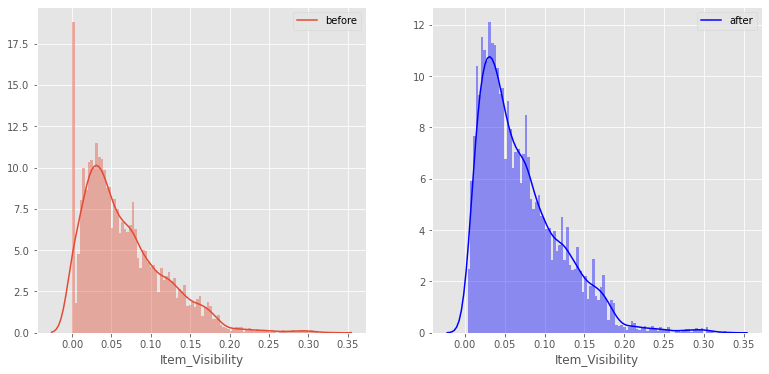

In [32]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(13,6)) 
sns.distplot(mart_exploration["Item_Visibility"], bins = 100, ax=axs[0], kde_kws={"label": "before"})
sns.distplot(my_data["Item_Visibility"], bins = 100, ax=axs[1], color="b", kde_kws={"label": "after"})

<div class="alert alert-block alert-danger"><b>Be Aware!</b> these displots are mixing grocery, non grocery and outlet type together, main purpose of these charts is only to show that zero values are replaced.</div>

- [x] repair zero values in Item_Visibility column

### OptionalChanger

Now it's time for second part of my custom data preparation, and that's optional changes, which can be used in hyperparameter tuning.

<div class="alert alert-block alert-success"><b>OptionalChanger: </b>code</div>

In [33]:
class OptionalChanger(BaseEstimator, TransformerMixin):
    """Change data"""
    
    def __init__(self, 
                columns_to_drop = None, #drops columns
                change_year = True, #changes year to old and new
                year_new = 2008, #year from which is store evaluated as a new one
                change_outo18 = False,#changes outo18 Outlet_Type
                change_size = False, #changes sizes of stores
                rescale_visibility = False,
                ): 
        
        self.columns_to_drop = columns_to_drop
        self.change_year = change_year
        self.year_new = year_new
        self.change_outo18 = change_outo18
        self.change_size = change_size
        self.rescale_visibility = rescale_visibility
        
        
        
    def fit(self, data, y=None):
        """mandatory method for transformer"""        
        return self
    

    """_______________________________| YEAR ESTABLISHMENT - CHANGE |_______________________________"""
    
    
    def year_change(self, data):
        """Changes years only to old and new"""
        if self.change_year:
            data["Outlet_Establishment_Year"]\
            [(data["Outlet_Establishment_Year"]>self.year_new)] = "new"
            data["Outlet_Establishment_Year"]\
            [(data["Outlet_Establishment_Year"] != "new")] = "old"
        #I can also evaluate as 1 and 0 ...
        
        
    """__________________________________| OUTO18 TYPE  - CHANGE |___________________________________"""
    
    def outo18_type(self,data):
        """Changes type of store for outo18"""
        if self.change_outo18:
            data["Outlet_Type"][(data["Outlet_Identifier"]== "OUT018")] = "Supermarket Type1"
            #this will mainly affect encoding for outlet type - outo18 is only one in type2 category
            #and is very similar to others in type2 
                   
    
    """___________________________________| OUTLET_SIZE - CHANGE |____________________________________"""
    
    
    def change_outlet_size(self,data):
        if self.change_size:
            data["Outlet_Size"][(data["Outlet_Type"] == "Grocery Store")] = "Small"
            data["Outlet_Size"][(data["Outlet_Type"] != "Grocery Store")] = "Big"
        #much simplier method - and can be also used for nan values
        
   
    """___________________________________| VISIBLITY - CHANGE |____________________________________"""
    
    #NOTE: rescaler would take care of it probably, but it is fun task to do :)
    
    def visibility_rescale(self, data):
        """changes the visibility from 60 to 100"""
        if self.rescale_visibility: 
            #firstly I am creating list of stores in my table
            outlet_list = list(data["Outlet_Identifier"].value_counts().index)
            #counting sum of visibility for each store
            sum_visibility = data[["Item_Visibility","Outlet_Identifier"]].groupby("Outlet_Identifier").sum()
            #and calculate their ratio to 100%
            sum_visibility["coef"] = (100/sum_visibility["Item_Visibility"])
            #creationg a list with ration
            coef_list = list(sum_visibility["coef"])
            #my result is something like - OUTO49, ratio 1.5 --> meaning each value has to be 
            #multiplicated *1,5 -> to achieve that final sum of visibility values is 100 (for each store)
            
            #now i will iterate through all stores and change their visiblity values based on their coef
            for i in range(len(outlet_list)):
                #this part filter table based on store ID and indicates that we want change item visibility
                data.loc[(data["Outlet_Identifier"] == outlet_list[i]), "Item_Visibility"] = \
                data["Item_Visibility"][(data["Outlet_Identifier"] == outlet_list[i])]*coef_list[i]
                #this part filter the values I want change and multiplicate them by its coefficient
    
    
    """_____________________________________| COLUMNS - RENAMING |______________________________________"""
    
    def rename_columns(self, data):
        """Renaming function - if columns are not in data they won't be affected""" 
        new_names = {"Item_Identifier": "Item_Identifier_CAT", 
                     "Item_Fat_Content": "Item_Fat_Content_CAT",
                     "Item_Type" : "Item_Type_CAT",
                    "Outlet_Identifier": "Outlet_Identifier_CAT",
                    "Outlet_Establishment_Year": "Outlet_Establishment_Year_CAT",
                    "Outlet_Size" : "Outlet_Size_CAT",
                    "Outlet_Location_Type" : "Outlet_Location_Type_CAT",
                    "Outlet_Type" : "Outlet_Type_CAT",
                    
                    "Item_Weight" : "Item_Weight_NUM" ,
                    "Item_Visibility" : "Item_Visibility_NUM",
                    "Item_MRP" : "Item_MRP_NUM",}
        return data.rename(columns=new_names, inplace=True)

    """_____________________________________________| SUMMARY|__________________________________________"""

    def transform(self, data):
        
        self.year_change(data) #changes years to old and new
        self.outo18_type(data) #changes type for outo18 from type2 to type1
        self.change_outlet_size(data) #changes size of stores
        self.visibility_rescale(data)
        
        
        #drops optional number of columns
        self.columns_to_drop and data.drop(self.columns_to_drop, 1, inplace=True)#short circuit with and
        
        
        self.rename_columns(data) #renaminig my columns
    
            
        return data

<div class="alert alert-block alert-success"><b>OptionalChanger: </b>functionality check</div>

I skipped MRP, I dunno how to deal with gaps and deleting outliers has to be done outside of transformers.

In [34]:
my_data = DataChanger().fit_transform(pd.read_csv("train_big_mart.csv"))
my_data = OptionalChanger(columns_to_drop = "Item_Weight", 
                          change_year=True,
                          change_outo18=True,
                          change_size=True,
                          rescale_visibility=True).fit_transform(my_data)

In [35]:
"Item_Weight" in my_data.columns

False

- [x] ability to delete columns

In [36]:
my_data["Outlet_Establishment_Year_CAT"].value_counts()

old    7595
new     928
Name: Outlet_Establishment_Year_CAT, dtype: int64

- [x] simplification of the year column

In [37]:
my_data["Outlet_Type_CAT"][(my_data["Outlet_Identifier_CAT"]== "OUT018")].head()

1     Supermarket Type1
5     Supermarket Type1
16    Supermarket Type1
31    Supermarket Type1
32    Supermarket Type1
Name: Outlet_Type_CAT, dtype: object

- [x] changing OUTO18 from type2 to type1

In [38]:
my_data["Outlet_Size_CAT"].value_counts()

Big      7440
Small    1083
Name: Outlet_Size_CAT, dtype: int64

- [x] simplification of size column

In [39]:
my_data["Item_Visibility_NUM"].sum()/my_data["Outlet_Identifier_CAT"].nunique()

100.00816656122993

- [x] manual rescaling of visibility

I can see that rescaling is not perfect, I have something about 0.008% above 100%..But for this purpose, it really doesn't matter. Lastly I am renaming my columns for last transformer.

In [40]:
my_data.columns

Index(['Item_Identifier_CAT', 'Item_Fat_Content_CAT', 'Item_Visibility_NUM',
       'Item_Type_CAT', 'Item_MRP_NUM', 'Outlet_Identifier_CAT',
       'Outlet_Establishment_Year_CAT', 'Outlet_Size_CAT',
       'Outlet_Location_Type_CAT', 'Outlet_Type_CAT', 'Item_Outlet_Sales'],
      dtype='object')

I am giving categorical data ending _CAT and _NUM for numerical data. It's just because I dunno what columns I will use ..this way it's more generic because I can easily generate list of columns and if some column is missing, it just won't be renamed.

### NumCatChanger

Lastly i need to scale and encode my data. Let's create custom transformer which will take care of that.

<div class="alert alert-block alert-success"><b>NumCatChanger: </b>code</div>

In [41]:
class NumCatChanger(BaseEstimator, TransformerMixin):
    """Transformers for categorical and numerical data"""
    
    def __init__(self, 
                 transformer_name = StandardScaler, #default value 
                 column_transfer = [], #changes columns from nominal to ordinal
                 num_ordina_scaler = StandardScaler, #second optinal scaling
                 switch_pipe = False, #switch from ordinal to ordinal and scaling
                ):
        
        self.transformer_name = transformer_name
        self.column_transfer = column_transfer
        self.mappings = []
        self.num_ordina_scaler  = num_ordina_scaler
        self.switch_pipe = switch_pipe
        
        
    def fit(self, data, y=None):
        """mandatory method for transformer"""        
        return self  
        
        
    def transform(self, data):
        """Set of transformers"""
        numeric_columns = [col for col in data.columns if "_NUM" in col] #columns for numeric pipelines
        #all of my columns are supposed to be nominal, if I don't say otherwise 
        #it's a list of all columns having "CAT in name and are not in my self.column_transfer list"
        nominal_columns = [col for col in data.columns if "_CAT" in col if col not in self.column_transfer]
        ordinal_columns = self.column_transfer #optional ordinal columns - based on my transformer parameter

        #Mapping for ordinal if necessary - in this case only out of curiosity
        #I wont use ordinal for Item ID and Outer ID and Location and Fat_Content
        Outlet_Type_ORD = {'col': 'Outlet_Type_CAT', 'mapping': {"Grocery Store" : 1, "Supermarket Type1": 2, 
                                                                 "Supermarket Type2": 3, "Supermarket Type3" : 4}}
        
        Outlet_Size_ORD = {'col': 'Outlet_Size_CAT', 'mapping': {"Small" : 1, "Medium" : 2, "High" : 3}}
        Outlet_Year_ORD = {'col': 'Outlet_Establishment_Year_CAT', 'mapping': {"new" : 1, 
                                                                               "old" : 2,
                                                                               }}
                           
        #Activate mapping 
        if "Outlet_Type_CAT" in self.column_transfer:
            self.mappings.append(Outlet_Type_ORD)
        if "Outlet_Size_CAT" in self.column_transfer:
            self.mappings.append(Outlet_Size_ORD)
        if "Outlet_Establishment_Year_CAT" in self.column_transfer: #debug
            self.mappings.append(Outlet_Year_ORD)
        
        #individual pipelines
        #For numerical values - I can pick what scaler i want in pipe parameters
        num_pipeline = Pipeline([("optional num transformer", self.transformer_name())]) #regular
        num_pipeline2 = Pipeline([("optional num transformer", self.num_ordina_scaler())])#for num_ord_col
        #I am having two pipes - one for regular numbers and second for case when I am also scaling ordinal
        
        #For nominal values - this one is easy just 1 and 0 
        nominal_pipeline = Pipeline([("One_Hot_Encoder", OneHotEncoder())])
        #For ordinal values - uses my mapping from above!
        
        #Now i generate True and False values for my Pipes - depends if I am using a switcher or not
        if not self.switch_pipe:
            ordinal_pipeline = Pipeline([("Ordinal_Encoder", encoders.OrdinalEncoder(mapping = self.mappings))])
            #If my switcher is False - I am using only ordinal 
        else:
            ordinal_pipeline = Pipeline([("Ordinal_Encoder", encoders.OrdinalEncoder(mapping = self.mappings))])
            nom_ord_pipe = Pipeline(steps=[("ordinal", ordinal_pipeline), ("ordi_num", num_pipeline2)])
            ordinal_pipeline = False
            #If my switcher is True I am using ordinal - and immediately after that scaler of my choice
        
        
        #final pipeline
        colum_transformer = ColumnTransformer([("numeric", num_pipeline, numeric_columns),
                                               ("nominal", nominal_pipeline, nominal_columns),
                                               ("ordinal",ordinal_pipeline or nom_ord_pipe, ordinal_columns),
                                               ],remainder='drop') #passthrough
        return colum_transformer.fit_transform(data)      
    
    #and = False or END, or True or END

<div class="alert alert-block alert-success"><b>NumCatChanger: </b>functionality check</div>

I wanna check my ordinal variables and num columns. I don't need check nominal encoding for Item_Identifier and Item_Type, mainly because it would generate sparse matrix and its difficult for introspection.

In [42]:
my_data = DataChanger().fit_transform(pd.read_csv("train_big_mart.csv"))
my_data = OptionalChanger(columns_to_drop = ["Item_Identifier","Item_Type"],
                          change_outo18=True,
                          change_size=True,
                          rescale_visibility=True).fit_transform(my_data)

In [43]:
my_data.head()

,Item_Weight_NUM,Item_Fat_Content_CAT,Item_Visibility_NUM,Item_MRP_NUM,Outlet_Identifier_CAT,Outlet_Establishment_Year_CAT,Outlet_Size_CAT,Outlet_Location_Type_CAT,Outlet_Type_CAT,Item_Outlet_Sales
0,9.30,Low Fat,0.026277,249.8092,OUT049,old,Big,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.031925,48.2692,OUT018,new,Big,Tier 3,Supermarket Type1,443.4228
2,17.50,Low Fat,0.027444,141.6180,OUT049,old,Big,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.064509,182.0950,OUT010,old,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.022110,53.8614,OUT013,old,Big,Tier 3,Supermarket Type1,994.7052


In [44]:
my_encoder = NumCatChanger(column_transfer="Outlet_Establishment_Year_CAT", switch_pipe = True)

In [45]:
encoding_check = my_encoder.fit_transform(my_data)

In [46]:
encoding_check

array([[-0.7697559 , -1.09481388,  1.74745381, ...,  1.        ,
         0.        ,  0.34955064],
       [-1.49746111, -1.02689957, -1.48902325, ...,  1.        ,
         0.        , -2.86081583],
       [ 0.99568277, -1.08078192,  0.01004021, ...,  1.        ,
         0.        ,  0.34955064],
       ...,
       [-0.48986928, -0.70996449, -0.89720755, ...,  1.        ,
         0.        ,  0.34955064],
       [-1.21972746,  1.48060551, -0.60797692, ...,  1.        ,
         0.        , -2.86081583],
       [ 0.41437979, -0.51223005, -1.05226104, ...,  1.        ,
         0.        ,  0.34955064]])

I really wanted to check this funcionality. Everything else is just fine, year changes is default now, much easier to maintain whole funcionality.

In [47]:
my_data = DataChanger().fit_transform(pd.read_csv("train_big_mart.csv"))
my_data = OptionalChanger(change_outo18=True,
                          change_size=True,
                          rescale_visibility=True).fit_transform(my_data)

In [48]:
my_encoder = NumCatChanger(column_transfer=["Outlet_Establishment_Year_CAT","Outlet_Size_CAT","Outlet_Type_CAT"],
                           switch_pipe = True)

In [49]:
my_encoder.fit_transform(my_data)

<8523x1596 sparse matrix of type '<class 'numpy.float64'>'
	with 93753 stored elements in Compressed Sparse Row format>

My final matrix is a sparse one, because mainly my Item_Identifier is filled with a lot of zeros. However all three transformes are working well, it's time for modeling part.

## Model selection

I will split this part into more section. Trying these approaches:

1. Dropping Item Identifier column
2. Stratify data bsed on Item Identifier
3. Adding some new columns
4. Deleting outliers 

After choosing best approach and model, I will proceed with hyperparameter tuning.

<div class="alert alert-block alert-warning"><b>Classifiers</b></div>

*I will just try multiple models and see how they perform*

In [138]:
classifiers = [
    BaggingRegressor(),
    AdaBoostRegressor(),
    LGBMRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    linear_model.SGDRegressor(),
    linear_model.ElasticNet(),
    linear_model.Lasso(alpha=0.1),
    ]

<div class="alert alert-block alert-warning"><b>Evaluation function</b></div>

In [139]:
def evaluate(classifiers = classifiers, rmse = rmse, mse = mse):

    #basic lists
    final = []
    mse_max, rmse_max, mse_avg, rmse_avg, mse_min, rmse_min = [], [], [], [], [], []
    classifier_list = [(type(classifier).__name__) for classifier in classifiers]
    #my evaluate function I am basically iterating through rmse and mse results and dividing them
    #into more sections
    for s in range(len(classifier_list)):
        mse_max.append(max(mse[s::len(classifier_list)]))
        rmse_max.append(max(rmse[s::len(classifier_list)]))

        mse_min.append(min(mse[s::len(classifier_list)]))
        rmse_min.append(min(rmse[s::len(classifier_list)]))

        mse_avg.append(np.mean(mse[s::len(classifier_list)]))
        rmse_avg.append(np.mean(rmse[s::len(classifier_list)]))
        final.append(classifier_list[s])

    final_result = pd.DataFrame(None)
    final_result = pd.DataFrame(data = {"classifier" : final,
                                        "MSE_min" : mse_min,
                                        "MSE_avg" : mse_avg,
                                        "MSE_max" : mse_max,
                                        "RMSE_min" : rmse_min,
                                        "RMSE_avg" : rmse_avg,
                                        "RMSE_max" : rmse_max,})
    return final_result.style.highlight_min(axis=0) #I am "printing" with lowest value higlighted

### V1: Dropping Item_Identifier column

<div class="alert alert-block alert-success"><b>Pipelines :</b> V1 dropping Item ID</div>

*I will keep my pipelines setting the same, only after choosing best approach and best model I will try some tuning.*

In [135]:
pipeline_datachanger = Pipeline([("changing data", DataChanger())])
pipeline_optchanger = Pipeline([("edit data", OptionalChanger(columns_to_drop = "Item_Identifier",
                                                              change_outo18=True,
                                                                   change_size=True,
                                                                   rescale_visibility=True))])
pipeline_encoder = Pipeline([("encode data", NumCatChanger(column_transfer=["Outlet_Establishment_Year_CAT",
                                                                            "Outlet_Size_CAT",
                                                                            "Outlet_Type_CAT"],
                                                           switch_pipe = True))])

full_pipeline = Pipeline(steps=[("basic change", pipeline_datachanger),
                              ("column_transformer", pipeline_optchanger),
                               ("encoding",pipeline_encoder)])

<div class="alert alert-block alert-success"><b>Testing:</b> V1 dropping Item ID</div>

In [140]:
#For evalutation:
mse_v1, rmse_v1 = [], []
 #name of classifiers

X_y = pd.read_csv("train_big_mart.csv") 
X, y = X_y.iloc[:,:-1], X_y.iloc[:,-1:] #splitting the labels

n=20 #number of interation

for _ in range(n):
    #splitting to train, test with n splits
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=random.randint(34,40)/100) #i am also using randomized split for now from 15-30%
    X_train = full_pipeline.fit_transform(X_train) #training data
    X_test = full_pipeline.transform(X_test) #transforming data
    
    for classifier in classifiers: #i will iterate through all of my classifiers
        classifier.fit(X_train, y_train) #training my data
        y_pred = classifier.predict(X_test) #making a prediction
        mse_v1.append(mean_squared_error(y_test, y_pred))
        rmse_v1.append(np.sqrt(mean_squared_error(y_test, y_pred)))

<div class="alert alert-block alert-success"><b>Evaluation:</b> V1 dropping Item ID</div>

In [141]:
evaluate(rmse = rmse_v1, mse = mse_v1)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,BaggingRegressor,1223414.227670,1369747.967678,1531890.498998,1106.080570,1169.863953,1237.695641
1,AdaBoostRegressor,1664324.908474,1854499.842622,2151426.209930,1290.087171,1360.550304,1466.774083
2,LGBMRegressor,1124279.359637,1239164.008881,1364257.899527,1060.320404,1112.828023,1168.014512
3,ExtraTreesRegressor,1320820.704301,1413801.292926,1522954.556867,1149.269640,1188.814305,1234.080450
4,RandomForestRegressor,1167105.282797,1272547.909472,1402545.115917,1080.326470,1127.756086,1184.290976
5,SGDRegressor,1168297.577780,1284201.712188,1406516.171017,1080.878151,1132.869566,1185.966345
6,ElasticNet,1703962.949116,1838809.770184,1968209.828044,1305.359318,1355.602812,1402.929017
7,Lasso,1167267.767049,1283357.766262,1406970.179634,1080.401669,1132.492331,1186.157738


It looks like we have more good classifiers. For now LGBM is looking best. Adaboost and Elastic nets is performing much worser then others, so I wont proceed with them in next section.

### V2: Stratifying based on Item_Identifier

<div class="alert alert-block alert-success"><b>Pipelines :</b> V2 Item_ID stratify</div>

*Almost the same as in V1, I just don't delete Item_Identifier column.*

In [142]:
pipeline_datachanger = Pipeline([("changing data", DataChanger())])
pipeline_optchanger = Pipeline([("edit data", OptionalChanger(change_outo18=True,
                                                                   change_size=True,
                                                                   rescale_visibility=True))])
pipeline_encoder = Pipeline([("encode data", NumCatChanger(column_transfer=["Outlet_Establishment_Year_CAT",
                                                                            "Outlet_Size_CAT",
                                                                            "Outlet_Type_CAT"],
                                                           switch_pipe = True))])

full_pipeline = Pipeline(steps=[("basic change", pipeline_datachanger),
                              ("column_transformer", pipeline_optchanger),
                               ("encoding",pipeline_encoder)])

<div class="alert alert-block alert-success"><b>Testing:</b> V2 Item_ID stratify</div>

Firstly I need to delete products which appear only once in my dataset. If this approach looked as a great idea I could make some kind of universal product for low frequency Items, for now I'll just omit them.

In [143]:
#Preparing data 
X_y = pd.read_csv("train_big_mart.csv")
items = X_y["Item_Identifier"].value_counts().to_dict().items() #creating tuples with ID and count number
unique_items_threshold = 2 #our threshold meaning I want only product over 2 unique ID..
X_y = X_y[X_y["Item_Identifier"].isin([key for key, val in items if val > unique_items_threshold])]
#filtering our table - in this case products which occures only once are will note be indluced in the table

#For evalutation:
mse_v2, rmse_v2 = [], []

X, y = X_y.iloc[:,:-1], X_y.iloc[:,-1:] #splitting the labels
n=10 #number of interation

for _ in range(n):
    #splitting to train, test with n splits
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=random.randint(20,34)/100, stratify=X.iloc[:,0]) #NOW WITH STRATIFY!
    X_train = full_pipeline.fit_transform(X_train) #training data
    X_test = full_pipeline.transform(X_test) #transforming data
    
    for classifier in classifiers: #i will iterate through all of my classifiers
        #print((type(classifier).__name__))
        classifier.fit(X_train, y_train) #training my data
        y_pred = classifier.predict(X_test) #making a prediction
        mse_v2.append(mean_squared_error(y_test, y_pred))
        rmse_v2.append(np.sqrt(mean_squared_error(y_test, y_pred)))

<div class="alert alert-block alert-success"><b>Evaluation:</b> V2 Item_ID stratify</div>

In [144]:
evaluate(rmse = rmse_v2, mse = mse_v2)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,BaggingRegressor,1303317.485009,1439839.077217,2039803.457078,1141.629312,1197.261004,1428.216880
1,AdaBoostRegressor,1718493.015978,1905533.683346,2286975.236618,1310.913047,1379.256080,1512.274855
2,LGBMRegressor,1161979.854887,1279508.474342,1773384.389664,1077.951694,1129.013860,1331.684794
3,ExtraTreesRegressor,1324280.970385,1467553.276586,1926901.348214,1150.774074,1209.773138,1388.128722
4,RandomForestRegressor,1223563.372239,1351379.073391,1886145.306012,1106.147988,1160.155492,1373.370054
5,SGDRegressor,1314951.568603,1424075.456918,1845095.358052,1146.713377,1191.891445,1358.342872
6,ElasticNet,1728014.064291,1857951.506518,1967347.455718,1314.539488,1362.883098,1402.621637
7,Lasso,1431126.200090,1515586.536421,1774692.828572,1196.296870,1230.508777,1332.175975


I have no improvement in my RMSE results. Which is a small disappointment, I am going from +- 40 columns to 6248, with no effect. Bottom Line - ID_Stratify is a bad approach.

In [59]:
X_train

<6501x1552 sparse matrix of type '<class 'numpy.float64'>'
	with 52008 stored elements in Compressed Sparse Row format>

<div class="alert alert-block alert-danger"><b>Threshold testing</b></div>

I just wanna try different threshold and see if the prediction will be better for higher n. If not, there is no connection between price and item_identifier (whcih would be kind of weird..).

In [60]:
mse, rmse = [], []

for s in range(2,9):
    X_y = pd.read_csv("train_big_mart.csv")
    items = X_y["Item_Identifier"].value_counts().to_dict().items() #creating tuples with ID and count number
    X_y = X_y[X_y["Item_Identifier"].isin([key for key, val in items if val > s])]
    X, y = X_y.iloc[:,:-1], X_y.iloc[:,-1:]
    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=X.iloc[:,0]) 
    X_train = full_pipeline.fit_transform(X_train) #training data
    X_test = full_pipeline.transform(X_test) #transforming data
    
    for classifier in classifiers: #i will iterate through all of my classifiers
        classifier.fit(X_train, y_train) #training my data
        y_pred = classifier.predict(X_test) #making a prediction
        mse.append(mean_squared_error(y_test, y_pred))
        rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [61]:
pd.DataFrame(data = {"classifier" : final,
                     "n=2" : rmse[::7],
                     "n=3" : rmse[1::7],
                     "n=4" : rmse[2::7],
                     "n=5" : rmse[3::7],
                     "n=6" : rmse[4::7],
                     "n=7" : rmse[5::7],
                     "n=8" : rmse[6::7],
                    }).style.highlight_min(axis=1)

,classifier,n=2,n=3,n=4,n=5,n=6,n=7,n=8
0,AdaBoostRegressor,1507.627799,1165.102022,1165.233948,1117.746702,1171.200122,1371.752166,1205.971758
1,BaggingRegressor,1485.963788,1178.335789,1196.692025,1134.136614,1178.866196,1378.471677,1208.625378
2,ExtraTreesRegressor,1308.661268,1167.833923,1201.188318,1136.926014,1191.632721,1371.715724,1233.159324
3,RandomForestRegressor,1231.640189,1169.824147,1164.761484,1111.462346,1157.443307,1351.384128,1196.962858
4,SGDRegressor,1535.254931,1193.633762,1202.567748,1143.319350,1180.983194,1404.326352,1220.584020
5,ElasticNet,1365.548873,1240.427009,1268.949828,1214.011072,1224.464690,1379.574601,1246.015101
6,Lasso,1428.136447,1387.129493,1416.058519,1374.418369,1335.477604,1621.169689,1318.836474


Well I am getting interesting results. From n = 4 to n=6 I have better results, for all of my models. If the n is too high I am having a low number of values so my model is not trained so well, and vice versa if I have lower n, it's not able to find any pattern.

I have no meaningful connection between Item Identifier and Item_Outlet_Sales. I need to use Item Identifier a bit differently. 

### V3: ColumnsAdder

I will try to add some new columns using grouping and standard deviation of MRP and as the final result I want to have MRP_Min and MRP_Max as a range. Because Outlet Sales values are oscillatining giving MRP range to items instead of just one value could be useful.

<div class="alert alert-block alert-warning"><b>Classifiers V2</b> only well performing from now</div>

In [168]:
classifiers_2 = [
    BaggingRegressor(),
    LGBMRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    linear_model.SGDRegressor(),
    linear_model.Lasso(alpha=0.1),
    ]
#elastic net and adaboost deleted

<div class="alert alert-block alert-success"><b>CustomTransformer</b> V3 ColumnsAdder</div>

<div class="alert alert-block alert-info"><b>Note:</b> ColumnsAdder only precalculates my column for another calculation - I wanna use STD values to create +- range.</div>

In [177]:
class ColumnsAdder(BaseEstimator, TransformerMixin):
    "Just adding some columns"
    def __init__(self,
                 item_std = False,
                 outlet_item_fat_std = False,
                 mean_values = False):
        
        self.item_std = item_std
        self.outlet_item_fat_std = outlet_item_fat_std
        self.mean_values = mean_values
        
    def fit(self, data, y=None):
        return self
        

    def transform(self, data):
        
        """Done"""
        def fitem_std(row): #grouping based only on Item ID
            for item in set(data["Item_Identifier"]):
                if row["Item_Identifier"] == item:
                    value = data.groupby("Item_Identifier").std()["Item_MRP"][item]
            return value
          
        """Testing""" 
        def foutlet_item_fat_std(row): #grouping based on outlet - item typ and fat content
            for item in set(data["Outlet_Identifier"]):
                for item2 in set(data["Item_Type"]):
                    for item3 in set(data["Item_Fat_Content"]):
                        if row["Outlet_Identifier"] == item and row["Item_Type"] \
                        == item2 and row["Item_Fat_Content"] == item3:
                            value = data.groupby(["Outlet_Identifier","Item_Type","Item_Fat_Content"]).std()\
                            ["Item_MRP"][item][item2][item3]
            return value
      
        """Testing"""
        def fmean_values(row): #only mean grouping
            for item in set(data["Outlet_Identifier"]):
                for item2 in set(data["Item_Type"]):
                    for item3 in set(data["Item_Fat_Content"]):
                        if row["Outlet_Identifier"] == item and row["Item_Type"] \
                        == item2 and row["Item_Fat_Content"] == item3:
                            value = data.groupby(["Outlet_Identifier","Item_Type","Item_Fat_Content"]).mean()\
                            ["Item_MRP"][item][item2][item3]
            return value
        
        
        """Calling my functions"""
        if self.item_std:
            data.insert(2,"item_std_NUM", data.apply(fitem_std, axis=1),True)
            data["item_std_NUM"].fillna(data["item_std_NUM"].mean(),inplace=True)
            
        if self.outlet_item_fat_std:
            data.insert(2,"outlet_item_fat_std_NUM",data.apply(foutlet_item_fat_std, axis=1),True)
            data["outlet_item_fat_std_NUM"].fillna(data["outlet_item_fat_std_NUM"].mean(),inplace=True)
            
        if self.mean_values:
            data.insert(2,"mean_values_NUM", data.apply(fmean_values, axis=1),True)
            data["mean_values_NUM"].fillna(data["mean_values_NUM"].mean(),inplace=True)


        return data
            
        

I have transformer which can create some new columns, it's only based on simple logic, that I am looking how much a different types of products differ from each other. So I am using groupby and std() function. But it is only first part of data preparation, these columns are not useful if I am not creating an MRP range from them. Firstly lets recreate version of data which I can use in future. It's good to copy them, because this approach is computationally intensive.

*Firstly my data caller.*

In [601]:
def triple_data(data="train_big_mart.csv"):
    data_triple = pd.read_csv(data)
    data_triple["Item_Fat_Content"][(data_triple["Item_Fat_Content"]==  "LF")] = "Low Fat"
    data_triple["Item_Fat_Content"][(data_triple["Item_Fat_Content"]==  "low fat")] = "Low Fat"
    data_triple["Item_Fat_Content"][(data_triple["Item_Fat_Content"]==  "reg")] = "Regular"
    return data_triple

<div class="alert alert-block alert-success"><b>Data Loading...</b> V3 ColumnsAdder</div>

In [254]:
mart_fitem_std = ColumnsAdder(item_std=True).fit_transform(triple_data())

In [182]:
mart_fmean_values = ColumnsAdder(mean_values=True).fit_transform(triple_data())

In [186]:
mart_foutlet_item_fat_std = ColumnsAdder(outlet_item_fat_std=True).fit_transform(triple_data()) #TOHLE SPUSTIT

*Adding mean columns.*

In [255]:
mart_fitem_std.insert(2,"mean_values_NUM", mart_fmean_values["mean_values_NUM"],False)

In [192]:
mart_foutlet_item_fat_std.insert(2,"mean_values_NUM", mart_fmean_values["mean_values_NUM"],False)

<div class="alert alert-block alert-success"><b>Range Creator</b> V3 ColumnsAdder</div>

So now I have different types of my train tests and I wanna use my precalculated columns to recreate MRP column, meaning I want to delete (probably) MRP and replace it with MRP_Min and MRP_Max. BeAware! Std. is too low, I have to multiplicate my std() values and create +- range. It would require some kind of smart testing function :). Firstly lets write my function for range creation.

In [261]:
def mrp_range_std(data=data, delete_MRP = True, delete_MRP_mean = True, n_max = 15, n_min =15,):
    #it recieves pandas dataframe, and n_max coeffs and n_min coeffs are for std multiplication
    new_data = data.copy()
    if "item_std_NUM" in new_data.columns:
        new_data.insert(2,"MRP_Min_NUM", (new_data["Item_MRP"] - ((new_data["item_std_NUM"])* n_min)))
        new_data.insert(2,"MRP_Max_NUM", (new_data["Item_MRP"] + ((new_data["item_std_NUM"])* n_max)))
        new_data.drop("item_std_NUM", axis=1, inplace=True)
    if "outlet_item_fat_std_NUM" in new_data.columns:
        new_data.insert(2,"MRP_Min_NUM", (new_data["Item_MRP"] - ((new_data["outlet_item_fat_std_NUM"])* n_min)))
        new_data.insert(2,"MRP_Max_NUM", (new_data["Item_MRP"] + ((new_data["outlet_item_fat_std_NUM"])* n_max)))
        new_data.drop("outlet_item_fat_std_NUM", axis=1, inplace=True)
    if delete_MRP:
        new_data.drop("Item_MRP", axis=1, inplace = True)
    if delete_MRP_mean:
        new_data.drop("mean_values_NUM", axis=1, inplace = True)

    return new_data
    
#my defualt settings is simple, I dont wanna have MRP column and MRP_mean also, and I want one of my std values
#and create a range of MRP..
#if I wanna use MRP and MRP mean only - I don't need this function ..

Okay, now I have my function for range creation and therefore I can test, which combinations of columns and range values, perform best! Firstly mandatory pipeline.

<div class="alert alert-block alert-success"><b>Pipelines:</b> V3 ColumnsAdder</div>

*Withou any change, I can't use my ColumnsAdder - has to be done before splitting my data!*

In [257]:
pipeline_datachanger = Pipeline([("changing data", DataChanger())])
pipeline_optchanger = Pipeline([("edit data", OptionalChanger(columns_to_drop = "Item_Identifier",
                                                              change_outo18=True,
                                                                   change_size=True,
                                                                   rescale_visibility=True))])
pipeline_encoder = Pipeline([("encode data", NumCatChanger(column_transfer=["Outlet_Establishment_Year_CAT",
                                                                            "Outlet_Size_CAT",
                                                                            "Outlet_Type_CAT"],
                                                           switch_pipe = True))])

full_pipeline = Pipeline(steps=[("basic change", pipeline_datachanger),
                              ("column_transformer", pipeline_optchanger),
                               ("encoding",pipeline_encoder)])

<div class="alert alert-block alert-success"><b>Testing and evaluating:</b> ColumnsAdder - columns combinations</div>

Firstly I will try to find which combinations of columns is best and after that I will looking for best size of range. Recall that the average Random Forest results was 1160 and 1129 for LGBMRegressor. BeAware: even if it will perfom worse I still has to try step2 and changing the size of my MRP range values!

In [252]:
#d1.drop(["MRP_Min_NUM","MRP_Max_NUM"], axis=1, inplace=True)

In [262]:
d1 = mrp_range_std(data=mart_fitem_std, delete_MRP = True, delete_MRP_mean = True, n_max = 15, n_min =15)
d2 = mrp_range_std(data=mart_fitem_std, delete_MRP = False, delete_MRP_mean = False, n_max = 15, n_min =15) 
d3 = mrp_range_std(data=mart_foutlet_item_fat_std, delete_MRP = True, delete_MRP_mean = True, n_max = 1, n_min =1)
d4 = mrp_range_std(data=mart_foutlet_item_fat_std, delete_MRP = False, delete_MRP_mean = False, n_max = 1, n_min =1)
d5 = mart_fmean_values
#std in d1 and d2 is very low, so I have coeff 15 and in 1 I have coef 1...
#I suppose that low std will be much better cause I would be able to manipulate with my value on  much accurate scale

Here is my five datasets, I could probably doing some more crazy combinations. But I guess that this will be sufficient.

In [515]:
def classify_and_evaluate(data=data, rmse=rmse, mse=mse, classifiers = classifiers, n = 10):
    mse, rmse = [], []
    X_y = data
    X, y = X_y.iloc[:,:-1], X_y.iloc[:,-1:]
    
    for _ in range(n):
        #splitting to train, test with n splits
        X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=random.randint(34,40)/100) #i am also using randomized split for now from 15-30%
        X_train = full_pipeline.fit_transform(X_train) #training data
        X_test = full_pipeline.transform(X_test) #transforming data

        for classifier in classifiers: #i will iterate through all of my classifiers
            classifier.fit(X_train, y_train) #training my data
            y_pred = classifier.predict(X_test) #making a prediction
            mse.append(mean_squared_error(y_test, y_pred))
            rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return evaluate(rmse = rmse, mse = mse, classifiers = classifiers)

<div class="alert alert-block alert-warning"><b>Results for d1</b> without MRP and Mean and STD based on Item Id *15</div>

In [279]:
classify_and_evaluate(data=d1,classifiers=classifiers_2)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,BaggingRegressor,1342400.863046,1400435.420398,1456574.698046,1158.620241,1183.281636,1206.886365
1,LGBMRegressor,1219424.088968,1265261.327819,1346466.091188,1104.275368,1124.705499,1160.373255
2,ExtraTreesRegressor,1331312.302482,1397704.107931,1475291.125611,1153.825074,1182.130905,1214.615629
3,RandomForestRegressor,1237983.426814,1296908.584684,1365366.260905,1112.647036,1138.669557,1168.488879
4,SGDRegressor,1245390.423431,1300329.675596,1355209.092559,1115.970619,1140.186327,1164.134482
5,Lasso,1246490.244314,1299823.432035,1353293.776400,1116.463275,1139.973689,1163.311556


<div class="alert alert-block alert-warning"><b>Results for d2</b> with MRP and Mean and STD based on Item Id *15</div>

In [280]:
classify_and_evaluate(data=d2,classifiers=classifiers_2)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,BaggingRegressor,1331163.821868,1376219.687073,1458996.495394,1153.760730,1172.953646,1207.889273
1,LGBMRegressor,1175463.037837,1247215.769999,1323236.361981,1084.187732,1116.584597,1150.320113
2,ExtraTreesRegressor,1273407.971264,1375663.800470,1462505.231136,1128.453797,1172.603221,1209.340825
3,RandomForestRegressor,1197163.585183,1267717.851048,1350112.904829,1094.149709,1125.738481,1161.943589
4,SGDRegressor,1205847.614582,1277070.040720,1384306.460302,1098.110930,1129.882789,1176.565536
5,Lasso,1206989.047738,1276971.723895,1377834.502676,1098.630533,1129.851190,1173.811954


<div class="alert alert-block alert-warning"><b>Results for d3</b> without MRP and Mean and STD based on Outlet,Fat and Type </div>

In [281]:
classify_and_evaluate(data=d3,classifiers=classifiers_2)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,BaggingRegressor,1311957.582145,1377834.829489,1418230.241735,1145.407169,1173.721633,1190.894723
1,LGBMRegressor,1209334.899113,1261616.645704,1291574.741816,1099.697640,1123.161174,1136.474699
2,ExtraTreesRegressor,1354743.616160,1440753.189229,1485959.233957,1163.934541,1200.204075,1218.999276
3,RandomForestRegressor,1213051.805399,1278653.441849,1318965.026891,1101.386311,1130.702104,1148.462027
4,SGDRegressor,1241101.358242,1296223.124028,1338731.307446,1114.047287,1138.459170,1157.035569
5,Lasso,1240031.187713,1295021.942905,1338635.010343,1113.566876,1137.929394,1156.993954


<div class="alert alert-block alert-warning"><b>Results for d4</b> with MRP and Mean and STD based on Outlet,Fat and Type </div>

In [282]:
classify_and_evaluate(data=d4,classifiers=classifiers_2)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,BaggingRegressor,1292450.481298,1385059.265221,1428086.363147,1136.859922,1176.790881,1195.025675
1,LGBMRegressor,1212959.940232,1257996.159635,1314924.670126,1101.344606,1121.519372,1146.701648
2,ExtraTreesRegressor,1370425.059222,1427163.170150,1509143.272809,1170.651553,1194.552109,1228.471926
3,RandomForestRegressor,1216814.099597,1275174.991640,1350441.335621,1103.092970,1129.133286,1162.084909
4,SGDRegressor,1231547.180059,1285324.924681,1347319.345823,1109.750954,1133.643805,1160.740861
5,Lasso,1224775.571858,1283686.625766,1343965.043594,1106.695790,1132.918819,1159.295063


<div class="alert alert-block alert-warning"><b>Results for d5</b> just MRP mean</div>

In [283]:
classify_and_evaluate(data=d5,classifiers=classifiers_2)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,BaggingRegressor,1306225.516785,1372205.336256,1432835.397902,1142.902234,1171.282142,1197.011027
1,LGBMRegressor,1184578.100720,1243040.979503,1297729.643213,1088.383251,1114.809413,1139.179373
2,ExtraTreesRegressor,1312720.298629,1417151.876216,1488270.587873,1145.740066,1190.282728,1219.946961
3,RandomForestRegressor,1208822.971443,1272776.057342,1314250.946526,1099.464857,1128.062857,1146.407845
4,SGDRegressor,1247207.736921,1291442.065996,1338734.486415,1116.784553,1136.331035,1157.036943
5,Lasso,1249153.594207,1291303.885363,1334347.719149,1117.655400,1136.275213,1155.139697


As I expected D3 and D4 are not so good, bud simple MRP mean and D2 - meanig creating range from STD calculated from same Item_Identifier are having best results. In D5 I have no options how to tune my column. I just have mean values and that's it. But in D2 and possibly D1, I can manipulate my n_min and n_max and decrease or increase my range and find optimum MRP values, so I will definitely try that and see if I can push my RMSE lower and outperform D5 or not. And I wanna also try D2 with MRP deleted and then with MRP mean deleted.

<div class="alert alert-block alert-success"><b>Testing and evaluating:</b> D2 tuning</div>

I will use only LGBMRegressor for this purpose. I can see that Random and SGD or Lasso are perfoming similary, but I need to make more iterations to make my results more credible.

In [291]:
classifiers_3 = [
    LGBMRegressor()
    ]

In [292]:
d2a = mrp_range_std(data=mart_fitem_std, delete_MRP = False, delete_MRP_mean = True, n_max = 15, n_min =15)
d2b = mrp_range_std(data=mart_fitem_std, delete_MRP = True, delete_MRP_mean = False, n_max = 15, n_min =15) 
d2c = mrp_range_std(data=mart_fitem_std, delete_MRP = True, delete_MRP_mean = True, n_max = 15, n_min =15) 
d2d = mrp_range_std(data=mart_fitem_std, delete_MRP = False, delete_MRP_mean = False, n_max = 15, n_min =15) 

<div class="alert alert-block alert-warning"><b>D2: </b>what to delete</div>

In [293]:
classify_and_evaluate(data=d2a,classifiers=classifiers_3,n=20)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,LGBMRegressor,1141343.840504,1237054.640386,1311612.906721,1068.336951,1112.084572,1145.256699


In [294]:
classify_and_evaluate(data=d2b,classifiers=classifiers_3,n=20)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,LGBMRegressor,1167690.853376,1242861.069690,1329875.696269,1080.597452,1114.715662,1153.202366


In [295]:
classify_and_evaluate(data=d2c,classifiers=classifiers_3,n=20)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,LGBMRegressor,1172007.161115,1248387.280859,1299883.638774,1082.592796,1117.169037,1140.124396


In [296]:
classify_and_evaluate(data=d2d,classifiers=classifiers_3,n=20)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,LGBMRegressor,1167376.590018,1245913.686482,1316076.220076,1080.452030,1116.069941,1147.203652


My D2A seems to be the best fit. But only by an inch.

<div class="alert alert-block alert-warning"><b>D2: </b>n_max and n_min</div>

I will make it simple, try some big ranges and see the results. There is a lot of combinations available, but for me its about getting an intuition what is ideal range. Looking for some holy grail combination can 

In [299]:
d2a_1 = mrp_range_std(data=mart_fitem_std, delete_MRP = False, delete_MRP_mean = True, n_max = 25, n_min =25)
d2a_2 = mrp_range_std(data=mart_fitem_std, delete_MRP = False, delete_MRP_mean = True, n_max = 50, n_min =50)
d2a_3 = mrp_range_std(data=mart_fitem_std, delete_MRP = False, delete_MRP_mean = True, n_max = 25, n_min =40)
d2a_4 = mrp_range_std(data=mart_fitem_std, delete_MRP = False, delete_MRP_mean = True, n_max = 40, n_min =25)
d2a_5 = mrp_range_std(data=mart_fitem_std, delete_MRP = False, delete_MRP_mean = True, n_max = 100, n_min =100)
d2a_6 = mrp_range_std(data=mart_fitem_std, delete_MRP = False, delete_MRP_mean = True, n_max = 10, n_min =10)

In [300]:
classify_and_evaluate(data=d2a_1,classifiers=classifiers_3,n=5)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,LGBMRegressor,1193782.196513,1265005.031421,1349046.342933,1092.603403,1124.499226,1161.484543


In [301]:
classify_and_evaluate(data=d2a_2,classifiers=classifiers_3,n=5)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,LGBMRegressor,1204452.793648,1249202.348940,1310506.197038,1097.475646,1117.492644,1144.773426


In [302]:
classify_and_evaluate(data=d2a_3,classifiers=classifiers_3,n=5)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,LGBMRegressor,1200115.269166,1230120.903626,1247350.903413,1095.497727,1109.078060,1116.848648


In [303]:
classify_and_evaluate(data=d2a_4,classifiers=classifiers_3,n=5)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,LGBMRegressor,1251172.898781,1270721.505636,1299182.063096,1118.558402,1127.239812,1139.816680


In [304]:
classify_and_evaluate(data=d2a_5,classifiers=classifiers_3,n=5)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,LGBMRegressor,1215375.034617,1243396.098277,1283359.791359,1102.440490,1115.012589,1132.854709


In [305]:
classify_and_evaluate(data=d2a_6,classifiers=classifiers_3,n=5)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,LGBMRegressor,1157123.852797,1236312.273750,1313028.532735,1075.696915,1111.653885,1145.874571


So I can definitely say, that adding MRP range and not deleting MRP itself and size of my range would be equal to from MRP - 40xSD() to MRP + 25xSD(), would be performing well. Its only a small change, but I will use it. Ofcourse I can calculate better range if I will notice reall result in my final testing.

In [314]:
outlier_data  = mrp_range_std(data=mart_fitem_std, delete_MRP = False, delete_MRP_mean = True, n_max = 25, n_min =40)

<div class="alert alert-block alert-danger"><b>BeAware:</b> I could achieve same results just using MRP_Item * coefficient and so on..Creating range for Items is probably good approach, but I dunno how :)..</div>

### V4: Outliers

It's simple. I wanna delete outliers for each store separately. But only on train_test and see the results. Behind this idea is just simple logic that extreme values are damaging my learning algorithm, again  I will try this only on LGBMRegressor..lack of time.

<div class="alert alert-block alert-success"><b>V4 Deleting function</b></div>

In [315]:
def delete_outliers(quantile=0.975, quantil_table=X_train):
    quantils = quantil_table[["Item_Outlet_Sales","Outlet_Identifier"]].groupby("Outlet_Identifier").quantile(quantile)
    #getting quantil values for each outlet
    index_drop = [] 
    for outlet, sales_threshold in list(zip(quantils.index,quantils.values)): #iterate through indexes and values
        #of my quantils series
        to_drop = quantil_table[(quantil_table["Outlet_Identifier"] == outlet) & \
                          (quantil_table["Item_Outlet_Sales"] > int(sales_threshold))].index
        #filtering the items which are over my threshold
        index_drop.append(to_drop) #list of indexes
    for index in index_drop: #dropping items from my table
        quantil_table.drop((index), inplace = True)
    return quantil_table

<div class="alert alert-block alert-success"><b>Pipelines :</b> V4 Outliers</div>

*Without any change.*

In [316]:
pipeline_datachanger = Pipeline([("changing data", DataChanger())])
pipeline_optchanger = Pipeline([("edit data", OptionalChanger(columns_to_drop = "Item_Identifier",
                                                              change_outo18=True,
                                                                   change_size=True,
                                                                   rescale_visibility=True))])
pipeline_encoder = Pipeline([("encode data", NumCatChanger(column_transfer=["Outlet_Establishment_Year_CAT",
                                                                            "Outlet_Size_CAT",
                                                                            "Outlet_Type_CAT"],
                                                           switch_pipe = True))])

full_pipeline = Pipeline(steps=[("basic change", pipeline_datachanger),
                              ("column_transformer", pipeline_optchanger),
                               ("encoding",pipeline_encoder)])

<div class="alert alert-block alert-success"><b>V4 Curve of best quantil: </b>LGBMRegressor</div>

In [318]:
rmse, n_coef = [], []
X_y = outlier_data

for _ in range(5):
    n = 0.1
    while n < 0.999 :
        #Very easy - just need better precision the closer I am getting to number one
        X_train ,X_test = train_test_split(X_y, test_size=0.33)
        X_train = delete_outliers(quantile=n,quantil_table=X_train) #OUTLIER DELETER
        if n < 0.79:
            n += 0.1
        elif n > 0.79 and n < 0.95:
            n += 0.02
        else:
            n += 0.004
        X_train, y_train = X_train.iloc[:,:-1], X_train.iloc[:,-1:]
        X_test, y_test = X_test.iloc[:,:-1], X_test.iloc[:,-1:]
        #I HAD TO FIRSTLY SPLIT X VALUES - DELETE OUTLIERS AND AFTER THAT SPLIT Y VALUES

        X_train = full_pipeline.fit_transform(X_train)
        X_test = full_pipeline.transform(X_test)

        LGBM = LGBMRegressor()
        LGBM.fit(X_train, y_train) 
        y_pred = LGBM.predict(X_test) 
        rmse.append(np.sqrt(mean_squared_error(y_test, y_pred))) #I am appending my rmse value
        n_coef.append(n) #I am appending my n coeficient - a quantil value
n_coef_forest = n_coef[0:26] #I just slice my coef list cause it has same values 5x
rmse2 = list(rmse)
rmse = np.array(rmse).reshape(5,25) #transforming my value to an array and reshaping
rmse_forest = list((rmse[0]+rmse[1]+rmse[2]+rmse[3]+rmse[4])/5) #averaging my rmse 

(0.8, 1.0)

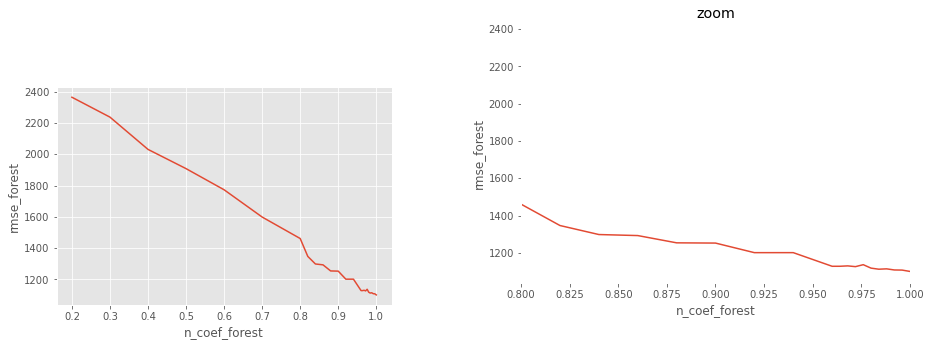

In [355]:
fig, ax = plt.subplots()
sns.lineplot(x="n_coef_forest", y="rmse_forest", data=data)

ax2 = plt.axes([1.2, 0.2, .9, .9], facecolor='w')
sns.lineplot(x="n_coef_forest", y="rmse_forest", data=data)
ax2.set_title('zoom')
ax2.set_xlim([0.80,1])

I can see, that I am not getting any extra value, for deleting outliers. Hence I can use my whole data set. Only from 97-99% I can get a tiny performance boost, but not guaranteed.

<div class="alert alert-block alert-warning"><b>V1 - V4</b> summary</div>

I 've tried more ways to improve my model, before diving into hyperparameters tuning and ensembling. And here are my observations:

1. Droping Item_ID and use std() with grouping is good approach
2. Sparse matrix and encoding Item_Identifier does not bring any added value
3. ColumnsAdder slightly improves model performance
4. Outlier deletion probably cannot improve performance (at least for RGBM and my deletor function)
5. Best performing models are LGBMRegressor, RandomForrestRegressor

## Hyperparameters tuning

I will tune these transformers/estimators:

- OptionalChanger
- NumCatChanger
- Top 3 classifiers

I will be using RandomizedSearchCV most of the time, not so accurate but faster, its precision time trade off.

In [386]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [397]:
def split_for_tuning(data=outlier_data, quantile=1): 
    X_y = data #recieves my outlier_data => with new column
    X_train ,X_test = train_test_split(X_y, test_size=0.33) #splitting only train and test
    X_train = delete_outliers(quantile=quantile,quantil_table=X_train) #deleting outliers from train
    X_train, y_train = X_train.iloc[:,:-1], X_train.iloc[:,-1:] #splitting labels..
    X_test, y_test = X_test.iloc[:,:-1], X_test.iloc[:,-1:]
     
    return X_train, X_test, y_train, y_test

In [477]:
def return_pipeline_log(classifier=LGBMRegressor):
    full_pipeline_log = Pipeline(steps=[("column_transformer", OptionalChanger(columns_to_drop = None,
                                                                             change_year = None,
                                                                              year_new = None,
                                                                              change_outo18 = None,
                                                                              change_size = None,
                                                                              rescale_visibility = None
                                                                             )),
                                   ("encoding",NumCatChanger(transformer_name = None,
                                                             column_transfer = [],
                                                             num_ordina_scaler = None,
                                                             switch_pipe = None)),
                                   ("classifier",classifier())])
    return full_pipeline_log

<div class="alert alert-block alert-success"><b>H-tuning</b> RandomForestRegressor</div>

In [478]:
X_train, X_test, y_train, y_test = split_for_tuning()

In [479]:
X_train = DataChanger().fit_transform(X_train)

In [480]:
param_grid_forest = {
    
    #columns changer param
    "column_transformer__columns_to_drop" : ["Item_Identifier"], #not interested in this one - better using feature
    #importance
    "column_transformer__change_year" : [True], #changin year maybe bottleneck?
    "column_transformer__change_outo18" : [False, True], #changing outo18 to another type
    "column_transformer__rescale_visibility" : [False, True], #rescaling visibility to 100%
    "column_transformer__change_size" : [False, True], #changing size of stores
    "column_transformer__year_new" : [2008],
       
    "encoding__transformer_name" : [Normalizer,StandardScaler,MinMaxScaler],
    "encoding__switch_pipe" : [True, False],
    "encoding__num_ordina_scaler" : [Normalizer,StandardScaler,MinMaxScaler],
    "encoding__column_transfer" : [["Outlet_Size_CAT","Outlet_Type_CAT"],"Outlet_Size_CAT","Outlet_Type_CAT"],

    'classifier__bootstrap': [True, False],
    'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [481]:
forest_search = RandomizedSearchCV(return_pipeline_log(classifier=RandomForestRegressor), \
                                   param_grid_forest, n_jobs= -1)

In [482]:
forest_model = forest_search.fit(X_train, y_train)

In [483]:
pd.set_option('display.max_colwidth', -1)
results = pd.DataFrame(forest_model.cv_results_)[["params", "mean_test_score", "rank_test_score"]]
results.sort_values("rank_test_score").head()

,params,mean_test_score,rank_test_score
6,"{'encoding__transformer_name': <class 'sklearn.preprocessing._data.StandardScaler'>, 'encoding__switch_pipe': False, 'encoding__num_ordina_scaler': <class 'sklearn.preprocessing._data.MinMaxScaler'>, 'encoding__column_transfer': 'Outlet_Size_CAT', 'column_transformer__year_new': 2008, 'column_transformer__rescale_visibility': True, 'column_transformer__columns_to_drop': 'Item_Identifier', 'column_transformer__change_year': True, 'column_transformer__change_size': False, 'column_transformer__change_outo18': False, 'classifier__n_estimators': 1600, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 30, 'classifier__bootstrap': True}",0.589215,1
0,"{'encoding__transformer_name': <class 'sklearn.preprocessing._data.MinMaxScaler'>, 'encoding__switch_pipe': True, 'encoding__num_ordina_scaler': <class 'sklearn.preprocessing._data.Normalizer'>, 'encoding__column_transfer': 'Outlet_Size_CAT', 'column_transformer__year_new': 2008, 'column_transformer__rescale_visibility': False, 'column_transformer__columns_to_drop': 'Item_Identifier', 'column_transformer__change_year': True, 'column_transformer__change_size': False, 'column_transformer__change_outo18': False, 'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 50, 'classifier__bootstrap': True}",0.580512,2
1,"{'encoding__transformer_name': <class 'sklearn.preprocessing._data.MinMaxScaler'>, 'encoding__switch_pipe': False, 'encoding__num_ordina_scaler': <class 'sklearn.preprocessing._data.MinMaxScaler'>, 'encoding__column_transfer': 'Outlet_Type_CAT', 'column_transformer__year_new': 2008, 'column_transformer__rescale_visibility': True, 'column_transformer__columns_to_drop': 'Item_Identifier', 'column_transformer__change_year': True, 'column_transformer__change_size': False, 'column_transformer__change_outo18': True, 'classifier__n_estimators': 1800, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 30, 'classifier__bootstrap': False}",0.316851,3
4,"{'encoding__transformer_name': <class 'sklearn.preprocessing._data.StandardScaler'>, 'encoding__switch_pipe': False, 'encoding__num_ordina_scaler': <class 'sklearn.preprocessing._data.Normalizer'>, 'encoding__column_transfer': 'Outlet_Type_CAT', 'column_transformer__year_new': 2008, 'column_transformer__rescale_visibility': False, 'column_transformer__columns_to_drop': 'Item_Identifier', 'column_transformer__change_year': True, 'column_transformer__change_size': False, 'column_transformer__change_outo18': True, 'classifier__n_estimators': 1800, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 70, 'classifier__bootstrap': False}",0.306858,4
2,"{'encoding__transformer_name': <class 'sklearn.preprocessing._data.Normalizer'>, 'encoding__switch_pipe': False, 'encoding__num_ordina_scaler': <class 'sklearn.preprocessing._data.MinMaxScaler'>, 'encoding__column_transfer': 'Outlet_Type_CAT', 'column_transformer__year_new': 2008, 'column_transformer__rescale_visibility': True, 'column_transformer__columns_to_drop': 'Item_Identifier', 'column_transformer__change_year': True, 'column_transformer__change_size': True, 'column_transformer__change_outo18': True, 'classifier__n_estimators': 1800, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 60, 'classifier__bootstrap': False}",0.274588,5


I will use hyperparameters from rank 1.

<div class="alert alert-block alert-success"><b>H-tuning</b> LGBMRegressor</div>

In [493]:
X_train, X_test, y_train, y_test = split_for_tuning()

In [494]:
X_train = DataChanger().fit_transform(X_train)

In [495]:
param_grid_lgbmr = {
    
    #columns changer param
    "column_transformer__columns_to_drop" : ["Item_Identifier"], #not interested in this one - better using feature
    #importance
    "column_transformer__change_year" : [True], #changin year maybe bottleneck?
    "column_transformer__change_outo18" : [False, True], #changing outo18 to another type
    "column_transformer__rescale_visibility" : [False, True], #rescaling visibility to 100%
    "column_transformer__change_size" : [False, True], #changing size of stores
    "column_transformer__year_new" : [2008],
       
    "encoding__transformer_name" : [Normalizer,StandardScaler,MinMaxScaler],
    "encoding__switch_pipe" : [True, False],
    "encoding__num_ordina_scaler" : [Normalizer,StandardScaler,MinMaxScaler],
    "encoding__column_transfer" : [["Outlet_Size_CAT","Outlet_Type_CAT"],"Outlet_Size_CAT","Outlet_Type_CAT"],

    'classifier__max_depth':[3,5,10,20,40,80],
    'classifier__num_leaves':[4,5,10,20,40,80],
    'classifier__min_data_in_leaf':[20,50,150,300,600,1200],
    'classifier__n_estimators':[550,1100,2200],
    'classifier__learning_rate':[0.04,0.5,0.1,0.2,0.01,0.001]}


In [496]:
o_encoder = RandomizedSearchCV(return_pipeline_log(), param_grid_lgbmr, n_jobs= -1)

In [497]:
optional_model = o_encoder.fit(X_train, y_train)

In [498]:
results = pd.DataFrame(optional_model.cv_results_)[["params", "mean_test_score", "rank_test_score"]]
results.sort_values("rank_test_score").head()

,params,mean_test_score,rank_test_score
1,"{'encoding__transformer_name': <class 'sklearn.preprocessing._data.StandardScaler'>, 'encoding__switch_pipe': False, 'encoding__num_ordina_scaler': <class 'sklearn.preprocessing._data.MinMaxScaler'>, 'encoding__column_transfer': 'Outlet_Type_CAT', 'column_transformer__year_new': 2008, 'column_transformer__rescale_visibility': False, 'column_transformer__columns_to_drop': 'Item_Identifier', 'column_transformer__change_year': True, 'column_transformer__change_size': True, 'column_transformer__change_outo18': False, 'classifier__num_leaves': 40, 'classifier__n_estimators': 2200, 'classifier__min_data_in_leaf': 300, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.01}",0.586805,1
5,"{'encoding__transformer_name': <class 'sklearn.preprocessing._data.MinMaxScaler'>, 'encoding__switch_pipe': False, 'encoding__num_ordina_scaler': <class 'sklearn.preprocessing._data.StandardScaler'>, 'encoding__column_transfer': 'Outlet_Type_CAT', 'column_transformer__year_new': 2008, 'column_transformer__rescale_visibility': False, 'column_transformer__columns_to_drop': 'Item_Identifier', 'column_transformer__change_year': True, 'column_transformer__change_size': True, 'column_transformer__change_outo18': True, 'classifier__num_leaves': 20, 'classifier__n_estimators': 2200, 'classifier__min_data_in_leaf': 300, 'classifier__max_depth': 20, 'classifier__learning_rate': 0.1}",0.555317,2
3,"{'encoding__transformer_name': <class 'sklearn.preprocessing._data.Normalizer'>, 'encoding__switch_pipe': True, 'encoding__num_ordina_scaler': <class 'sklearn.preprocessing._data.Normalizer'>, 'encoding__column_transfer': ['Outlet_Size_CAT', 'Outlet_Type_CAT'], 'column_transformer__year_new': 2008, 'column_transformer__rescale_visibility': False, 'column_transformer__columns_to_drop': 'Item_Identifier', 'column_transformer__change_year': True, 'column_transformer__change_size': False, 'column_transformer__change_outo18': True, 'classifier__num_leaves': 4, 'classifier__n_estimators': 1100, 'classifier__min_data_in_leaf': 50, 'classifier__max_depth': 80, 'classifier__learning_rate': 0.04}",0.549439,3
9,"{'encoding__transformer_name': <class 'sklearn.preprocessing._data.MinMaxScaler'>, 'encoding__switch_pipe': True, 'encoding__num_ordina_scaler': <class 'sklearn.preprocessing._data.Normalizer'>, 'encoding__column_transfer': ['Outlet_Size_CAT', 'Outlet_Type_CAT'], 'column_transformer__year_new': 2008, 'column_transformer__rescale_visibility': True, 'column_transformer__columns_to_drop': 'Item_Identifier', 'column_transformer__change_year': True, 'column_transformer__change_size': True, 'column_transformer__change_outo18': True, 'classifier__num_leaves': 4, 'classifier__n_estimators': 550, 'classifier__min_data_in_leaf': 50, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.2}",0.389986,4
6,"{'encoding__transformer_name': <class 'sklearn.preprocessing._data.MinMaxScaler'>, 'encoding__switch_pipe': False, 'encoding__num_ordina_scaler': <class 'sklearn.preprocessing._data.Normalizer'>, 'encoding__column_transfer': ['Outlet_Size_CAT', 'Outlet_Type_CAT'], 'column_transformer__year_new': 2008, 'column_transformer__rescale_visibility': False, 'column_transformer__columns_to_drop': 'Item_Identifier', 'column_transformer__change_year': True, 'column_transformer__change_size': True, 'column_transformer__change_outo18': True, 'classifier__num_leaves': 20, 'classifier__n_estimators': 1100, 'classifier__min_data_in_leaf': 150, 'classifier__max_depth': 80, 'classifier__learning_rate': 0.04}",0.387115,5


### Final Comparison

Now I just simply use my two best models and compare them again and I will check results.

In [542]:
classifier_forest = [RandomForestRegressor(n_estimators = 1600,
                                            min_samples_split = 2,
                                            min_samples_leaf = 2,
                                            max_features = "sqrt",
                                            max_depth = 30,
                                            bootstrap = True)]
classifier_lgbmr = [LGBMRegressor(num_leaves = 40,
                                  n_estimators = 2200,
                                  min_data_in_leaf = 300,
                                  max_depth = 5,
                                  learning_rate = 0.01     
                                 )]

<div class="alert alert-block alert-success"><b>RandomForestRegressor</b></div>

*Full pipeline for forest.*

In [513]:
pipeline_datachanger = Pipeline([("changing data", DataChanger())])
pipeline_optchanger = Pipeline([("edit data", OptionalChanger(columns_to_drop = "Item_Identifier",
                                                              change_outo18=False,
                                                              change_size=False,
                                                              year_new=2008,
                                                              change_year=True,
                                                              rescale_visibility=True))])


pipeline_encoder = Pipeline([("encode data", NumCatChanger(column_transfer=["Outlet_Size_CAT"],
                                                           transformer_name = StandardScaler,
                                                           num_ordina_scaler = MinMaxScaler,
                                                           switch_pipe = True))])

full_pipeline = Pipeline(steps=[("basic change", pipeline_datachanger),
                              ("column_transformer", pipeline_optchanger),
                               ("encoding",pipeline_encoder)])

In [516]:
classify_and_evaluate(data=outlier_data, n=15, classifiers = classifier_forest)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,RandomForestRegressor,1123557.067570,1209904.902344,1263248.989252,1059.979749,1099.863834,1123.943499


<div class="alert alert-block alert-success"><b>LGBMRegressor</b></div>

In [518]:
pipeline_datachanger = Pipeline([("changing data", DataChanger())])
pipeline_optchanger = Pipeline([("edit data", OptionalChanger(columns_to_drop = "Item_Identifier",
                                                              change_outo18=False,
                                                              change_size=True,
                                                              year_new=2008,
                                                              change_year=True,
                                                              rescale_visibility=False))])


pipeline_encoder = Pipeline([("encode data", NumCatChanger(column_transfer=["Outlet_Size_CAT"],
                                                           transformer_name = StandardScaler,
                                                           num_ordina_scaler = MinMaxScaler,
                                                           switch_pipe = False))])

full_pipeline = Pipeline(steps=[("basic change", pipeline_datachanger),
                              ("column_transformer", pipeline_optchanger),
                               ("encoding",pipeline_encoder)])

In [519]:
classify_and_evaluate(data=outlier_data, n=15, classifiers = classifier_lgbmr)

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,LGBMRegressor,1186911.391406,1244652.457469,1285613.569216,1089.454630,1115.569721,1133.849006


<div class="alert alert-block alert-success"><b>StackingRegressor</b></div>

I will just try Lasso with LGBM, but I guess I wont be able to improve my performance with this.

In [543]:
classifier_lgbmr[0]

LGBMRegressor(learning_rate=0.01, max_depth=5, min_data_in_leaf=300,
              n_estimators=2200, num_leaves=40)

In [587]:
from sklearn.ensemble import StackingRegressor


estimators = [
    ("forest", RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2, n_estimators=1600)),
    ("lgbmr", LGBMRegressor(learning_rate=0.01, max_depth=5, min_data_in_leaf=300,n_estimators=2200, num_leaves=40)),
    ("lasso", linear_model.Lasso()),
    ("sgd", linear_model.SGDRegressor())
]

stack = StackingRegressor(estimators=estimators, \
                          final_estimator=RandomForestRegressor(max_depth=30, 
                                                                max_features='sqrt', 
                                                                min_samples_leaf=2,
                                                                n_estimators=1600))


In [588]:
mse, rmse = [], []
X_y = outlier_data
X, y = X_y.iloc[:,:-1], X_y.iloc[:,-1:]
n=10

for _ in range(n):
    #splitting to train, test with n splits
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=random.randint(34,40)/100) #i am also using randomized split for now from 15-30%
    X_train = full_pipeline.fit_transform(X_train) #training data
    X_test = full_pipeline.transform(X_test) #transforming data

    stack.fit(X_train, y_train) #training my data
    y_pred = stack.predict(X_test) #making a prediction
    mse.append(mean_squared_error(y_test, y_pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [590]:
n = [n]
final = []
mse_max, rmse_max, mse_avg, rmse_avg, mse_min, rmse_min = [], [], [], [], [], []

for s in range(len(n)):
    mse_max.append(max(mse[s::len(n)]))
    rmse_max.append(max(rmse[s::len(n)]))

    mse_min.append(min(mse[s::len(n)]))
    rmse_min.append(min(rmse[s::len(n)]))

    mse_avg.append(np.mean(mse[s::len(n)]))
    rmse_avg.append(np.mean(rmse[s::len(n)]))
    
final_result = pd.DataFrame(None)
final_result = pd.DataFrame(data = {"classifier" : "StackingRegressor",
                                        "MSE_min" : mse_min,
                                        "MSE_avg" : mse_avg,
                                        "MSE_max" : mse_max,
                                        "RMSE_min" : rmse_min,
                                        "RMSE_avg" : rmse_avg,
                                    "RMSE_max" : rmse_max,})

final_result.style.highlight_min(axis=0) 

,classifier,MSE_min,MSE_avg,MSE_max,RMSE_min,RMSE_avg,RMSE_max
0,StackingRegressor,1155766.066868,1253522.897812,1321435.246126,1075.065610,1119.380397,1149.536970


StackingRegressor is probably not performing better than others.

**I can try all three models in final prediction. Its becoming clear that new columns are probably only approach how to achieve better performance. Most of my features has no significant importance, only MRP so its about bending MRP and using visiblity and weights for that purpose.**

## Final prediction at Analyticsvidhya

<div class="alert alert-block alert-warning"><b>Pipelines</b> just repetition</div>

In [624]:
pipeline_datachanger = Pipeline([("changing data", DataChanger())])
pipeline_optchanger = Pipeline([("edit data", OptionalChanger(columns_to_drop = "Item_Identifier",
                                                              change_outo18=False,
                                                              change_size=False,
                                                              year_new=2008,
                                                              change_year=True,
                                                              rescale_visibility=True))])


pipeline_encoder = Pipeline([("encode data", NumCatChanger(column_transfer=["Outlet_Size_CAT"],
                                                           transformer_name = StandardScaler,
                                                           num_ordina_scaler = MinMaxScaler,
                                                           switch_pipe = True))])

full_pipeline_forest = Pipeline(steps=[("basic change", pipeline_datachanger),
                              ("column_transformer", pipeline_optchanger),
                               ("encoding",pipeline_encoder)])


In [705]:
pipeline_datachanger = Pipeline([("changing data", DataChanger())])
pipeline_optchanger = Pipeline([("edit data", OptionalChanger(columns_to_drop = "Item_Identifier",
                                                              change_outo18=False,
                                                              change_size=True,
                                                              year_new=2008,
                                                              change_year=True,
                                                              rescale_visibility=False))])


pipeline_encoder = Pipeline([("encode data", NumCatChanger(column_transfer=["Outlet_Size_CAT"],
                                                           transformer_name = StandardScaler,
                                                           num_ordina_scaler = MinMaxScaler,
                                                           switch_pipe = False))])

full_pipeline_regressor = Pipeline(steps=[("basic change", pipeline_datachanger),
                              ("column_transformer", pipeline_optchanger),
                               ("encoding",pipeline_encoder)])

**I wasnt renaming them before because my evaluation function, bleh :).**

<div class="alert alert-block alert-warning"><b>Data preparation</b></div>

In [595]:
X_train = ColumnsAdder(item_std=True).fit_transform(triple_data()) #THIS ONE DO NOT OVERWRITE

In [602]:
X_test = ColumnsAdder(item_std=True).fit_transform(triple_data(data="test_big_mart.csv")) #THIS ONE DO NOT OVERWRITE

In [612]:
X_mean = mart_fmean_values = ColumnsAdder(mean_values=True).fit_transform(triple_data())

In [613]:
X_mean_test = mart_fmean_values = ColumnsAdder(mean_values=True).fit_transform(triple_data(data="test_big_mart.csv"))

In [614]:
X_test.insert(2,"mean_values_NUM", X_mean_test["mean_values_NUM"],False)
X_train.insert(2,"mean_values_NUM", X_mean["mean_values_NUM"],False)

________________

In [718]:
X_test_last = X_test.copy()
X_train_last = X_train.copy()

In [719]:
X_train_last = mrp_range_std(data=X_train_last, delete_MRP = False, delete_MRP_mean = True, n_max = 40, n_min =25)

In [720]:
X_test_last = mrp_range_std(data=X_test_last, delete_MRP = False, delete_MRP_mean = True, n_max = 40, n_min =25)

*Deleting Outliers optional and split*

In [721]:
X_train_last = delete_outliers(quantile=0.99,quantil_table=X_train_last)

In [722]:
X_train_last, y_train_last = X_train_last.iloc[:,:-1], X_train_last.iloc[:,-1:]

<div class="alert alert-block alert-warning"><b>Prediction forest</b></div>

In [687]:
X_train_last = full_pipeline_forest.fit_transform(X_train_last)

In [688]:
X_test_last = full_pipeline_forest.transform(X_test_last) 

In [689]:
classifier_forest[0].fit(X_train_last, y_train_last)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=1600)

In [693]:
y_pred_forest = classifier_forest[0].predict(X_test_last)

In [694]:
y_pred_forest

array([1712.79409128, 1324.59711705,  561.45577072, ..., 2000.45424121,
       3618.84575294, 1355.43647693])

***Best score 1147 - rank 187th of 4000***

<div class="alert alert-block alert-warning"><b>Prediction lgbmr</b></div>

In [706]:
X_train_last = full_pipeline_regressor.fit_transform(X_train_last)

In [707]:
X_test_last = full_pipeline_regressor.transform(X_test_last) 

In [708]:
classifier_lgbmr[0].fit(X_train_last, y_train_last)

LGBMRegressor(learning_rate=0.01, max_depth=5, min_data_in_leaf=300,
              n_estimators=2200, num_leaves=40)

In [709]:
y_pred_lgbmr = classifier_lgbmr[0].predict(X_test_last)

In [710]:
y_pred_lgbmr

array([1638.26375782, 1319.32438846,  798.85334749, ..., 1897.32184961,
       3752.64368845, 1276.841499  ])

***Best score 1160***

<div class="alert alert-block alert-warning"><b>Prediction StackRegressor</b></div>

In [723]:
X_train_last = full_pipeline_regressor.fit_transform(X_train_last)

In [724]:
X_test_last = full_pipeline_regressor.transform(X_test_last) 

In [725]:
stack.fit(X_train_last, y_train_last)

StackingRegressor(estimators=[('forest',
                               RandomForestRegressor(max_depth=30,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     n_estimators=1600)),
                              ('lgbmr',
                               LGBMRegressor(learning_rate=0.01, max_depth=5,
                                             min_data_in_leaf=300,
                                             n_estimators=2200,
                                             num_leaves=40)),
                              ('lasso', Lasso()), ('sgd', SGDRegressor())],
                  final_estimator=RandomForestRegressor(max_depth=30,
                                                        max_features='sqrt',
                                                        min_samples_leaf=2,
                                                        n_est

In [727]:
y_pred_stack = stack.predict(X_test_last)

In [728]:
y_pred_stack

array([2130.54870452, 1398.68872192,  477.85301635, ..., 1590.57213476,
       4088.08956388, 1501.92103121])

***Best Score 1198***

<div class="alert alert-block alert-warning"><b>Saving to CSV</b></div>

In [695]:
prediction_forest = X_test[["Item_Identifier","Outlet_Identifier"]]

In [696]:
prediction_forest["Item_Outlet_Sales"] = y_pred_forest

In [698]:
prediction_forest.to_csv("prediction_forest.csv", index=False)

________________________

In [714]:
prediction_lgbmr = X_test[["Item_Identifier","Outlet_Identifier"]]

In [715]:
prediction_lgbmr["Item_Outlet_Sales"] = y_pred_lgbmr

In [716]:
prediction_lgbmr["Item_Outlet_Sales"] = prediction_lgbmr["Item_Outlet_Sales"].abs()

In [717]:
prediction_lgbmr.to_csv("prediction_lgbmr.csv", index=False)

____________

In [729]:
prediction_stack = X_test[["Item_Identifier","Outlet_Identifier"]]

In [730]:
prediction_stack["Item_Outlet_Sales"] = y_pred_stack

In [731]:
prediction_stack["Item_Outlet_Sales"] = prediction_stack["Item_Outlet_Sales"].abs()

In [733]:
prediction_stack.to_csv("prediction_stack.csv", index=False)

<div class="alert alert-block alert-warning"><b>DEBUGGING BONUS: </b>Input contains NaN, infinity or a value too large for dtype('float32').</div>

In [726]:
#very handy function for finding if I am having some nan or inifnity values in sparse matrix
from scipy.sparse import coo_matrix
def find_nan_in_csr(X):

    X = coo_matrix(X)
    for i, j, v in zip(X.row, X.col, X.data):
        if (np.isnan(v) or np.isinf(v)):
            print(i, j, v)
    return None

***Okay that's it, my analysis is over. My final model is predicting quite well, and every steps I did led to a reduction of my RMSE. RandomForrest had the best results, which was 1147 at analyticsvidhya.com and this result occupies 187th place (for now). Which I consider as success. But! There is always something to improve, as I could see my model is far from perfect, my MRP range is only temporary solutions. I will get back as soon as possible and I will try improve my model especially by adding columns and reparing my range.***

<div class="alert alert-block alert-warning"><b>Future Ideas</b></div>

- changing MRP based on Weight/visibility and their percentil for each outlet in each product seciton (for now implemented only on test)
- rewrite MRP range => weights and visbility multiplicator
- find the unknown :)

***The End***